# III. Process the Data

So far in our data analysis process, we have completed the first two steps. 
**I. Ask**: Defined the problem and formulated clear questions to guide our anlalysis; and 
**II. Prepare**: Gathered the data, understood its content and format, and verified its integrity. This included combining multiple excel files and reformatting the data into a tabular structure.
We now have five usable datasets saved as five CSV files.

We are ready for our third step in the anlaysis process.
**III. Process**: Clean and manipulate the data, ensuring it is in a format ready for analysis.
We will do this third step in a notebook, using Python.

**A. Upload the datasets**

**1. Import the needed libraries.**

In [5]:
import pandas as pd
import os
import re
from datetime import datetime
from fuzzywuzzy import process

**2. Load the CSV files into a dictionary.**

In [7]:
# Define the folder path where the CSV files are stored
folder_path = r"C:\Users\rosse\Documents\Kathy's Cleaning\completed_datasets\csv_files"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary
dataframes = {file: pd.read_csv(os.path.join(folder_path, file)) for file in csv_files}

# Print the loaded file names to confirm
print("Loaded CSV files:", list(dataframes.keys()))

Loaded CSV files: ['customer_dataset.csv', 'employee_dataset.csv', 'payroll_dataset.csv', 'pay_dataset.csv', 'printouts_dataset.csv']


**3. Trim ".csv" from the dataset names.**

In [9]:
# Create a new dictionary with trimmed names
updated_dataframes = {}

for name, df in dataframes.items():
    new_name = name.replace(".csv", "")
    updated_dataframes[new_name] = df

# Replace the original dictionary with the updated one
dataframes = updated_dataframes

# Print the trimmed file names to confirm
print("Updated file names:", list(dataframes.keys()))

Updated file names: ['customer_dataset', 'employee_dataset', 'payroll_dataset', 'pay_dataset', 'printouts_dataset']


**B. Data Manipulation**

Cleaning the data consists of inspecting the data, standardizing the columns names, converting columns to appropriate datatypes, and accounting for missing values.

**1. Inspect the data**

In [13]:
# Check the first five rows of each dataset
for name, df in dataframes.items():
    print(f"First 5 rows of {name}:")
    print(df.head(), "\n" + "-"*50 + "\n")

First 5 rows of customer_dataset:
   customer_id customer_name customer_type
0            1         Hobbs         house
1            2        Neyman         house
2            3         Brown         house
3            4        Crosby         house
4            5      Kittrell         house 
--------------------------------------------------

First 5 rows of employee_dataset:
  employee_id STARTING DATE START BACK DATE    BIRTHDAY EMPLOYEE'S FIRST NAME  \
0     Breanna     4/11/2018             NaN    8/5/1992               Breanna   
1       Brian      1/1/2019      10/21/2021   3/22/1978                 Brian   
2       Cindy      8/5/2019       5/19/2023    6/1/1956                 Cindy   
3       Faith      8/1/2018             NaN   6/14/2001                 Faith   
4      Isaiah      8/1/2018             NaN  10/15/2002                Isaiah   

  EMPLOYEE'S LAST NAME  
0               Parker  
1              Rosseau  
2              Crowder  
3               Howell  
4        

In [14]:
# Check column names, data types, and missing values
for name, df in dataframes.items():
    print(f"Dataset: {name}")
    print(df.info(), "\n" + "-"*50 + "\n")

Dataset: customer_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    70 non-null     int64 
 1   customer_name  70 non-null     object
 2   customer_type  70 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB
None 
--------------------------------------------------

Dataset: employee_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            36 non-null     object
 1   STARTING DATE          36 non-null     object
 2   START BACK DATE        2 non-null      object
 3   BIRTHDAY               34 non-null     object
 4   EMPLOYEE'S FIRST NAME  36 non-null     object
 5   EMPLOYEE'S LAST NAME   36 non-null     object
dtypes: objec

**2. Standardize column names.**

Next, we will write a Python function to standardize the column names.

In [17]:
# Standardize column names by converting to lowercase, replacing spaces with underscores, and removing special characters.

def standardize_column_names(df):
    """
    Standardize column names by converting to lowercase, replacing spaces with underscores, and removing special characters.
    """
    df.columns = [
        re.sub(r"[^\w]", "", col.lower().replace(" ", "_"))
        for col in df.columns
    ]
    return df

# Apply function to all dataframes
for name, df in dataframes.items():
    dataframes[name] = standardize_column_names(df)
    print(f"Standardized column names in {name}")

Standardized column names in customer_dataset
Standardized column names in employee_dataset
Standardized column names in payroll_dataset
Standardized column names in pay_dataset
Standardized column names in printouts_dataset


**3. Fix data types**

Next, we will create Python functions to convert columns to their correct datatypes (e.g. integer, float, datetime, category, string).

In [20]:
# Convert all columns that end with '_id' in each dataset to 'category' datatype
for name, df in dataframes.items():
    id_columns = [col for col in df.columns if col.endswith("_id")]
    df[id_columns] = df[id_columns].astype("category")
    print(f"Converted columns in {name}: {id_columns}")

Converted columns in customer_dataset: ['customer_id']
Converted columns in employee_dataset: ['employee_id']
Converted columns in payroll_dataset: ['payroll_id', 'customer_id']
Converted columns in pay_dataset: ['pay_id', 'weekly_emp_pay_id']
Converted columns in printouts_dataset: ['printouts_id', 'payroll_id', 'customer_id']


In [21]:
# Identify "object" columns that should be converted
for name, df in dataframes.items():
    obj_cols = df.select_dtypes(include=["object"]).columns
    print(f"\n Possible conversions in {name}:")
    for col in obj_cols:
        print(f"- {col}:")
        print(df[col].head(2))
        print("-" * 50)


 Possible conversions in customer_dataset:
- customer_name:
0     Hobbs
1    Neyman
Name: customer_name, dtype: object
--------------------------------------------------
- customer_type:
0    house
1    house
Name: customer_type, dtype: object
--------------------------------------------------

 Possible conversions in employee_dataset:
- starting_date:
0    4/11/2018
1     1/1/2019
Name: starting_date, dtype: object
--------------------------------------------------
- start_back_date:
0           NaN
1    10/21/2021
Name: start_back_date, dtype: object
--------------------------------------------------
- birthday:
0     8/5/1992
1    3/22/1978
Name: birthday, dtype: object
--------------------------------------------------
- employees_first_name:
0    Breanna
1      Brian
Name: employees_first_name, dtype: object
--------------------------------------------------
- employees_last_name:
0     Parker
1    Rosseau
Name: employees_last_name, dtype: object
--------------------------------

In [22]:
# Convert 'week' and 'week_of' columns to appropriate datatype. Create 'week_number' columns if applicable.
for name, df in dataframes.items():
    # Convert 'week' columns to string if it exists
    if "week" in df.columns:
        df["week"] = df["week"].astype("string")

    # Convert 'week_of' columns to datetime if it exists
    if "week_of" in df.columns:
        df["week_of"] = pd.to_datetime(df["week_of"], format='%Y_%m_%d', errors="coerce")

    # Create 'week_number' columns from 'week_of' columns if applicable
    if "week_of" in df.columns:
        df["week_number"] = df["week_of"].dt.isocalendar().week.fillna(0).astype("int64")

    print(f"Processed {name}: week -> string, week_of -> datetime, week_number -> int64 (if applicable)")

Processed customer_dataset: week -> string, week_of -> datetime, week_number -> int64 (if applicable)
Processed employee_dataset: week -> string, week_of -> datetime, week_number -> int64 (if applicable)
Processed payroll_dataset: week -> string, week_of -> datetime, week_number -> int64 (if applicable)
Processed pay_dataset: week -> string, week_of -> datetime, week_number -> int64 (if applicable)
Processed printouts_dataset: week -> string, week_of -> datetime, week_number -> int64 (if applicable)


In [23]:
# Create a function to convert to datetime. Loop through dataframes to apply function appropriately.

# Define a function to convert to datetime
def convert_to_datetime(df, datetime_cols):
    """
    Converts specified columns in a dataframe to datetime.

    Parameters:
    - df: The dataframe to modify.
    - datetime_cols: A dictionary where keys are column names and values are their date formats.

    Returns:
    - dataframe: Updated dataframe with datetime conversions.
    """
    for col, fmt in datetime_cols.items():
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format=fmt, errors="coerce")
    return df

# Dictionary of datetime columns and their formats
datetime_columns = {
    "starting_date": "%m/%d/%Y",
    "start_back_date": "%m/%d/%Y",
    "birthday": "%m/%d/%Y",
    "date": "%m/%d/%Y",
    "start": "%I:%M %p",
    "end": "%I:%M %p",
}

# Loop through each dataframe in the dictionary and apply the function
for name, df in dataframes.items():
    dataframes[name] = convert_to_datetime(df, datetime_columns)
    print(f"Converted datetime columns in {name}")

    # Combine 'date' with 'start' and 'end' to create datetime columns
    if "date" in df.columns:
        if "start" in df.columns:
            start_datetime = []
            for index, row in df.iterrows():
                if pd.notnull(row["date"]) and pd.notnull(row["start"]):
                    start_datetime.append(datetime.combine(row["date"].date(), row["start"].time()))
                else:
                    start_datetime.append(pd.NaT)
            df["start_datetime"] = start_datetime
        
        if "end" in df.columns:
            end_datetime = []
            for index, row in df.iterrows():
                if pd.notnull(row["date"]) and pd.notnull(row["end"]):
                    end_datetime.append(datetime.combine(row["date"].date(), row["end"].time()))
                else:
                    end_datetime.append(pd.NaT)
            df["end_datetime"] = end_datetime

    # Create flag *before* replacing 'start' and 'end'
    if "start_datetime" in df.columns and "end_datetime" in df.columns:
        df['time_varies_by_employee'] = df[['start_datetime', 'end_datetime']].isnull().all(axis=1)

        # Overwrite 'start' and 'end' with datetime versions
        df["start"] = df["start_datetime"]
        df["end"] = df["end_datetime"]
        df.drop(columns=["start_datetime", "end_datetime"], inplace=True)
        
    # Create empty list to hold names of columns that were converted
    converted_cols = []

    # Check which datetime columns exist in the current dataframe
    for col in datetime_columns:
        if col in df.columns:
            converted_cols.append(col)

    # Add the new datetime columns if they exist
    if "start_datetime" in df.columns:
        converted_cols.append("start_datetime")
    if "end_datetime" in df.columns:
        converted_cols.append("end_datetime")

    # If any columns were converted, show the first two rows
    if converted_cols:
        print(df[converted_cols].head(5))
        print("\n")
    else:
        print("No matching datetime columns found in this dataframe.\n")

Converted datetime columns in customer_dataset
No matching datetime columns found in this dataframe.

Converted datetime columns in employee_dataset
  starting_date start_back_date   birthday
0    2018-04-11             NaT 1992-08-05
1    2019-01-01      2021-10-21 1978-03-22
2    2019-08-05      2023-05-19 1956-06-01
3    2018-08-01             NaT 2001-06-14
4    2018-08-01             NaT 2002-10-15


Converted datetime columns in payroll_dataset
        date               start                 end
0 2021-01-04                 NaT                 NaT
1 2021-01-05 2021-01-05 09:34:00 2021-01-05 11:01:00
2 2021-01-05 2021-01-05 11:10:00 2021-01-05 12:37:00
3 2021-01-05 2021-01-05 12:43:00 2021-01-05 14:36:00
4 2021-01-05 2021-01-05 14:48:00 2021-01-05 15:52:00


Converted datetime columns in pay_dataset
No matching datetime columns found in this dataframe.

Converted datetime columns in printouts_dataset
        date
0 2021-01-05
1 2021-01-05
2 2021-01-05
3 2021-01-05
4 2021-01-05




In [24]:
# Check the first five rows of each dataset
for name, df in dataframes.items():
    print(f"First 5 rows of {name}:")
    print(df.head(), "\n" + "-"*50 + "\n")

First 5 rows of customer_dataset:
  customer_id customer_name customer_type
0           1         Hobbs         house
1           2        Neyman         house
2           3         Brown         house
3           4        Crosby         house
4           5      Kittrell         house 
--------------------------------------------------

First 5 rows of employee_dataset:
  employee_id starting_date start_back_date   birthday employees_first_name  \
0     Breanna    2018-04-11             NaT 1992-08-05              Breanna   
1       Brian    2019-01-01      2021-10-21 1978-03-22                Brian   
2       Cindy    2019-08-05      2023-05-19 1956-06-01                Cindy   
3       Faith    2018-08-01             NaT 2001-06-14                Faith   
4      Isaiah    2018-08-01             NaT 2002-10-15               Isaiah   

  employees_last_name  
0              Parker  
1             Rosseau  
2             Crowder  
3              Howell  
4            Sandefur   
-------

In [25]:
# Create function to convert remaining 'object' columns to appropriate datatype. Loop through dataframes to apply function.

# Define a function to convert datatypes
def convert_dtypes(df, category_cols=None, string_cols=None, float_cols=None):
    """
    Convert specified columns in a dataframe to the desired datatype.

    Parameters:
    - df: The dataframe to modify.
    - category_cols: Columns to convert to 'category'.
    - string_cols: Columns to convert to 'string'.
    - float_cols: Columns to convert to 'float'.
    """
    if category_cols:
        for col in category_cols:
            if col in df.columns:
                df[col] = df[col].astype("category")
                
    if string_cols:
        for col in string_cols:
            if col in df.columns:
                df[col] = df[col].astype("string")

    if float_cols:
        for col in float_cols:
            if col in df.columns:
                df[col] = df[col].astype("float")

    return df

# Define column categories
category_columns = ["customer_type", "day_of_week", "employee",]
string_columns = ["customer_name", "employees_first_name", "employees_last_name", "job_name", "note",]
float_columns = ["hours",]

# Loop through each dataframe in the dictionary
for name, df in dataframes.items():
    dataframes[name] = convert_dtypes(df, category_cols=category_columns, string_cols=string_columns, float_cols=float_columns)
    print(f"Updated datatypes in {name}")

Updated datatypes in customer_dataset
Updated datatypes in employee_dataset
Updated datatypes in payroll_dataset
Updated datatypes in pay_dataset
Updated datatypes in printouts_dataset


In [26]:
# Check data types for all datasets
for name, df in dataframes.items():
    print(f"\n Data Types in {name}:")
    print(df.dtypes)
    print("-" * 50)


 Data Types in customer_dataset:
customer_id            category
customer_name    string[python]
customer_type          category
dtype: object
--------------------------------------------------

 Data Types in employee_dataset:
employee_id                   category
starting_date           datetime64[ns]
start_back_date         datetime64[ns]
birthday                datetime64[ns]
employees_first_name    string[python]
employees_last_name     string[python]
dtype: object
--------------------------------------------------

 Data Types in payroll_dataset:
payroll_id                       category
week                       string[python]
week_of                    datetime64[ns]
day_of_week                      category
date                       datetime64[ns]
start                      datetime64[ns]
end                        datetime64[ns]
hours                             float64
customer_id                      category
job_name                   string[python]
job_pays           

All the columns have been converted to their proper datatypes!

**4. Account for missing values**

Finally, we will check columns for missing values and fill them as appropriate.

In [30]:
# See how many missing values are in each column.
for name, df in dataframes.items():
    print(f"\n Missing Values in {name}:")
    print(df.isnull().sum())
    print("-" * 50)


 Missing Values in customer_dataset:
customer_id      0
customer_name    0
customer_type    0
dtype: int64
--------------------------------------------------

 Missing Values in employee_dataset:
employee_id              0
starting_date            0
start_back_date         34
birthday                 2
employees_first_name     0
employees_last_name      0
dtype: int64
--------------------------------------------------

 Missing Values in payroll_dataset:
payroll_id                    0
week                          0
week_of                       0
day_of_week                   0
date                          0
start                      1625
end                        1626
hours                      1617
customer_id                   0
job_name                      0
job_pays                    176
kathy                         0
note                       5217
week_number                   0
time_varies_by_employee       0
dtype: int64
-----------------------------------------------

In [31]:
# Fill missing values in "job_pays" columns to zero.
for name, df in dataframes.items():
    if "job_pays" in df.columns:
        df["job_pays"] = df["job_pays"].fillna(0)
        print(f"Filled missing values with 0 in {name} for 'job_pays' column.")
    else:
        print(f"'job_pays' column not found in {name}.")

'job_pays' column not found in customer_dataset.
'job_pays' column not found in employee_dataset.
Filled missing values with 0 in payroll_dataset for 'job_pays' column.
'job_pays' column not found in pay_dataset.
'job_pays' column not found in printouts_dataset.


In [32]:
# Check column names, data types, and missing values
for name, df in dataframes.items():
    print(f"Dataset: {name}")
    print(df.info(), "\n" + "-"*50 + "\n")

Dataset: customer_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customer_id    70 non-null     category
 1   customer_name  70 non-null     string  
 2   customer_type  70 non-null     category
dtypes: category(2), string(1)
memory usage: 3.8 KB
None 
--------------------------------------------------

Dataset: employee_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   employee_id           36 non-null     category      
 1   starting_date         36 non-null     datetime64[ns]
 2   start_back_date       2 non-null      datetime64[ns]
 3   birthday              34 non-null     datetime64[ns]
 4   employees_first_name  36 non-null     string        
 5 

Success! Our data has been processed and is ready for analysis!

# III. Analyze the Data

We are now ready for our fourth step in the data analysis process. **IV Analyze**: Perform data analysis, including statistical analysis, data interpretation, and identifying key insights.

For this step, we will use SQL.

### Export the dataframes to a SQL database

**1. Import the needed libraries**

In [38]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**2. Create a database engine**

In [40]:
engine = create_engine('sqlite:///lorie_database.db')

**3. Export dataframes to SQL**

In [42]:
for name, df in dataframes.items():
    # Use the dictionary key (dataset name) as the SQL table name
    table_name = name.replace("dataset", "table")
    df.to_sql(table_name, con=engine, if_exists='replace', index=False)
    print(f"Exported {name} to table '{table_name}' in the database.")

Exported customer_dataset to table 'customer_table' in the database.
Exported employee_dataset to table 'employee_table' in the database.
Exported payroll_dataset to table 'payroll_table' in the database.
Exported pay_dataset to table 'pay_table' in the database.
Exported printouts_dataset to table 'printouts_table' in the database.


**4. Preview the tables**

In [44]:
inspector = inspect(engine)
print("Tables in database:", inspector.get_table_names())

Tables in database: ['customer_table', 'employee_table', 'pay_table', 'payroll_table', 'printouts_table']


In [45]:
query = "SELECT * FROM customer_table LIMIT 5;"
df_customer = pd.read_sql(query, engine)
df_customer

,customer_id,customer_name,customer_type
0,1,Hobbs,house
1,2,Neyman,house
2,3,Brown,house
3,4,Crosby,house
4,5,Kittrell,house


In [46]:
query = "SELECT * FROM employee_table LIMIT 5"
df_emp = pd.read_sql(query, engine)
df_emp

,employee_id,starting_date,start_back_date,birthday,employees_first_name,employees_last_name
0,Breanna,2018-04-11 00:00:00.000000,None,1992-08-05 00:00:00.000000,Breanna,Parker
1,Brian,2019-01-01 00:00:00.000000,2021-10-21 00:00:00.000000,1978-03-22 00:00:00.000000,Brian,Rosseau
2,Cindy,2019-08-05 00:00:00.000000,2023-05-19 00:00:00.000000,1956-06-01 00:00:00.000000,Cindy,Crowder
3,Faith,2018-08-01 00:00:00.000000,None,2001-06-14 00:00:00.000000,Faith,Howell
4,Isaiah,2018-08-01 00:00:00.000000,None,2002-10-15 00:00:00.000000,Isaiah,Sandefur


In [47]:
query = "SELECT * FROM payroll_table LIMIT 5"
df_payroll = pd.read_sql(query, engine)
df_payroll

,payroll_id,week,week_of,day_of_week,date,start,end,hours,customer_id,job_name,job_pays,kathy,note,week_number,time_varies_by_employee
0,1,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Monday,2021-01-04 00:00:00.000000,None,None,NaN,6,COV SCHL,211.0,171.05,None,1,1
1,2,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Tuesday,2021-01-05 00:00:00.000000,2021-01-05 09:34:00.000000,2021-01-05 11:01:00.000000,1.450000,2,Neyman,85.0,54.26,None,1,0
2,3,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Tuesday,2021-01-05 00:00:00.000000,2021-01-05 11:10:00.000000,2021-01-05 12:37:00.000000,1.450000,3,Brown,85.0,54.26,None,1,0
3,4,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Tuesday,2021-01-05 00:00:00.000000,2021-01-05 12:43:00.000000,2021-01-05 14:36:00.000000,1.883333,4,Crosby,110.0,58.74,None,1,0
4,5,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Tuesday,2021-01-05 00:00:00.000000,2021-01-05 14:48:00.000000,2021-01-05 15:52:00.000000,1.066667,5,Kittrell,90.0,56.40,None,1,0


In [48]:
query = "SELECT * FROM pay_table LIMIT 5"
df_pay = pd.read_sql(query, engine)
df_pay

,pay_id,week_of,weekly_emp_pay_id,employee,pay_per_hour,note,week_number
0,2021_pay_1,2021-01-04 00:00:00.000000,1,Breanna,9.00,start date: 4/11/18,1
1,2021_pay_2,2021-01-04 00:00:00.000000,2,Brian,11.00,"start date: 01/19, Raise $1.00 on 7/1/19 End ...",1
2,2021_pay_3,2021-01-04 00:00:00.000000,3,Cindy,10.30,"start date: Aug 5, 2019 at $10.00 per hour. Ra...",1
3,2021_pay_4,2021-01-04 00:00:00.000000,4,Faith,9.75,"start date Aug 2018, raise 9/17/18 $.25, raise...",1
4,2021_pay_5,2021-01-04 00:00:00.000000,5,Isaiah,9.00,start date: 08/18 stop 1/11/19. Started again...,1


In [49]:
query = "SELECT * FROM printouts_table LIMIT 5"
df_printouts = pd.read_sql(query, engine)
df_printouts

,printouts_id,employee,payroll_id,week_of,date,day_of_week,customer_id,job_name,hours,pay,note,week_number
0,1,Cindy,4,2021-01-04 00:00:00.000000,2021-01-05 00:00:00.000000,Tuesday,4,Crosby,1.100000,11.33,None,1
1,2,Cindy,5,2021-01-04 00:00:00.000000,2021-01-05 00:00:00.000000,Tuesday,5,Kittrell,1.066667,10.99,None,1
2,3,Faith,2,2021-01-04 00:00:00.000000,2021-01-05 00:00:00.000000,Tuesday,2,Neyman,1.450000,14.14,None,1
3,4,Faith,3,2021-01-04 00:00:00.000000,2021-01-05 00:00:00.000000,Tuesday,3,Brown,1.450000,14.14,None,1
4,5,Faith,4,2021-01-04 00:00:00.000000,2021-01-05 00:00:00.000000,Tuesday,4,Crosby,1.883333,18.36,None,1


## Analysis for Question #1

We want to focus our analysis around the business questions that Kathy's Cleaning has given us. Let's look at the first question.

**Question 1: Under current conditions, how many hours should Kathy’s Cleaning be working each day at Covenant Academy in order to make it worthwhile for the business?**

Let's look at the various components of this question:

***"Under current conditions"***: this means the job duties and the employee staff for the current school year, Fall 2024 - Spring 2025.

***"Each working day"***: this refers to regular, after-school cleanings. Covenant Academy pays for various cleaning jobs year-round. But we are only focusing on normal cleanings that Kathy's Cleaning does at the end of each school day. The job_name we are looking for is called 'COV SCHL', and the job_pays would be a regular set amount, depending on the school year. 

***"In order to make it worthwhile for the business"***: The goal is for Kathy's Cleaning to profit about $100 of the income after paying employees. 


Let's begin by finding out what Kathy's Cleaning charges daily for an after-school cleaning. We know that the school year begins sometime in August and ends sometime in May each year. So we will exlude the partial and full summer months of May - August.

In [53]:
# Find the normal daily pay over the course of the four years, excluding summer months
query = """
SELECT 
    week_of, 
    job_pays, 
    COUNT(job_pays) AS num_jobs
FROM payroll_table
WHERE job_name = 'COV SCHL' 
    AND strftime('%m', week_of) NOT IN ('06', '07')                -- exclude summer months
GROUP BY job_pays
HAVING num_jobs > 50;                                              -- only include regular cleaning jobs
"""
df_normal_pay = pd.read_sql(query, engine)
df_normal_pay

,week_of,job_pays,num_jobs
0,2021-01-04 00:00:00.000000,211.0,97
1,2021-08-02 00:00:00.000000,215.0,195
2,2022-08-01 00:00:00.000000,219.0,383
3,2024-08-12 00:00:00.000000,230.0,90


We see that in January 2021 Kathy's Cleaning received \\$211 for normal cleaning jobs. This rate changed to \\$215 starting in August 2021. It went up again the following August to \\$219; and again two years later to \\$230.

Let's break this down by semester.

In [55]:
# Break it down by semester.
query = """
SELECT 
    CASE
        WHEN strftime('%m', week_of) IN ('01', '02', '03', '04', '05') THEN 'Spring'
        WHEN strftime('%m', week_of) IN ('08', '09', '10', '11', '12') THEN 'Fall'
        ELSE 'Summer'
    END AS semester,
    strftime('%Y', week_of) AS year,
    ROUND(AVG(job_pays)) AS daily_pay
FROM payroll_table
WHERE job_name = 'COV SCHL'
    AND strftime('%m', week_of) NOT IN ('06', '07')                     -- exclude summer months
    AND job_pays BETWEEN 211 AND 230
GROUP BY semester, year
ORDER BY year, semester DESC
"""
df_semester = pd.read_sql(query, engine)
df_semester

,semester,year,daily_pay
0,Spring,2021,211.0
1,Fall,2021,215.0
2,Spring,2022,215.0
3,Fall,2022,219.0
4,Spring,2023,219.0
5,Fall,2023,219.0
6,Spring,2024,219.0
7,Fall,2024,230.0


Now we will graph the results to get a visual by semester.

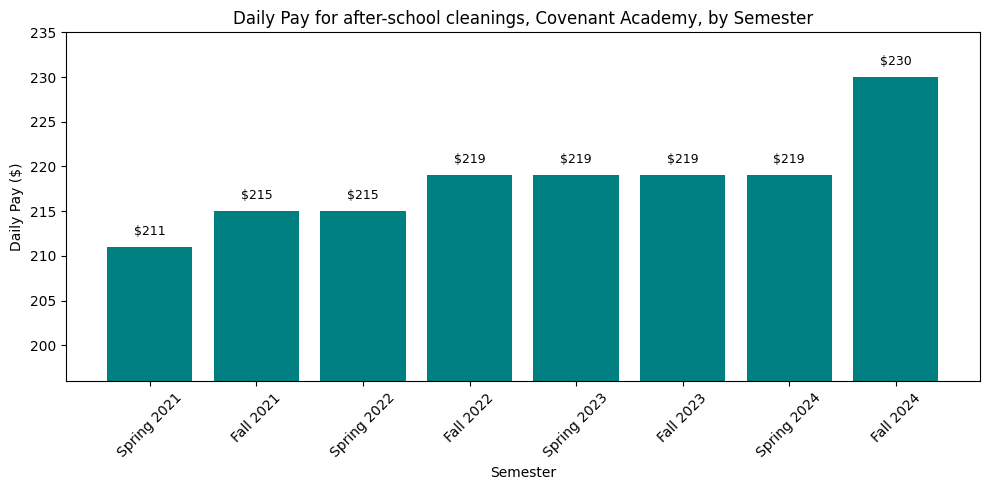

In [57]:
# Combine semester and year
df_semester['semester_label'] = df_semester['semester'] + ' ' + df_semester['year']

# Plot the bar graph
plt.figure(figsize=(10,5))
bars = plt.bar(df_semester['semester_label'], df_semester['daily_pay'], color = 'teal')
plt.title('Daily Pay for after-school cleanings, Covenant Academy, by Semester')
plt.xlabel('Semester')
plt.ylabel('Daily Pay ($)')

# Zoom in to see the differences
plt.ylim(df_semester['daily_pay'].min() - 15, df_semester['daily_pay'].max() + 5)

# Add labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"${round(height):,}",
        ha='center', va='bottom', fontsize=9
    )

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Next, we will see how Kathy's Cleaning has been doing in meeting its goal of $100 per day net income.

In the following code, we will calculate what it costs to pay each employee for each cleaning job. Then we will add together the "labor cost" of all employees to find the "total labor cost" for each cleaning job. Next, we will subtract this figure from the income received for the cleaning job, to arrive at the profit of each cleaning job. Finally, we will average the profit of all the after-school cleanings, breaking it down by semester for comparison.

In [60]:
# Step by step, calculate the average daily profit, by semester
query = """
-- Step 1: Calculate "labor_cost" of each employee, for each cleaning job, based on hours worked and normal hourly pay rate
WITH employee_hourly_pay AS (
    SELECT 
        e.employee, 
        e.payroll_id, 
        e.date, 
        e.hours, 
        e.pay, 
        y.pay_per_hour, 
        (e.hours * y.pay_per_hour) AS labor_cost 
    FROM printouts_table AS e 
    JOIN pay_table AS y 
    ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE e.hours IS NOT NULL
),

-- Step 2: Aggregate by payroll_id to simulate "total_labor_cost" and "total_hours" for each cleaning job
labor_by_job AS (
    SELECT 
        payroll_id,
        SUM(hours) AS total_hours,
        SUM(labor_cost) AS total_labor_cost
    FROM employee_hourly_pay
    GROUP BY payroll_id
),

-- Step 3: Join with payroll_table and subtract labor cost from what job pays to figure "calculated_profit" for each job
calculated_profit AS (
    SELECT 
      j.date,
      j.week_of,
      j.day_of_week,
      j.payroll_id,
      j.job_pays AS daily_income,
      j.kathy AS daily_profit,
      l.total_hours,
      l.total_labor_cost,
      (j.job_pays - l.total_labor_cost) AS calculated_profit
    FROM payroll_table AS j
    JOIN labor_by_job AS l
    ON j.payroll_id = l.payroll_id
    WHERE job_name = 'COV SCHL'
        AND strftime('%m', week_of) NOT IN ('06', '07')
        AND job_pays BETWEEN 211 AND 230
)

-- Step 4: Find the average calculated profit, broken down by semester
SELECT 
    CASE
        WHEN strftime('%m', week_of) IN ('01', '02', '03', '04', '05') THEN 'Spring'
        WHEN strftime('%m', week_of) IN ('08', '09', '10', '11', '12') THEN 'Fall'
        ELSE 'Summer'
    END AS semester,
    strftime('%Y', week_of) AS year,
    ROUND(AVG(calculated_profit),2) AS avg_daily_profit
FROM calculated_profit
GROUP BY semester, year
ORDER BY year, semester DESC
"""

df_new_net_sem = pd.read_sql(query, engine)
df_new_net_sem

,semester,year,avg_daily_profit
0,Spring,2021,102.62
1,Fall,2021,104.09
2,Spring,2022,109.41
3,Fall,2022,133.37
4,Spring,2023,118.89
5,Fall,2023,107.84
6,Spring,2024,105.87
7,Fall,2024,93.36


Now let's graph it, with a line indicating the profit goal.

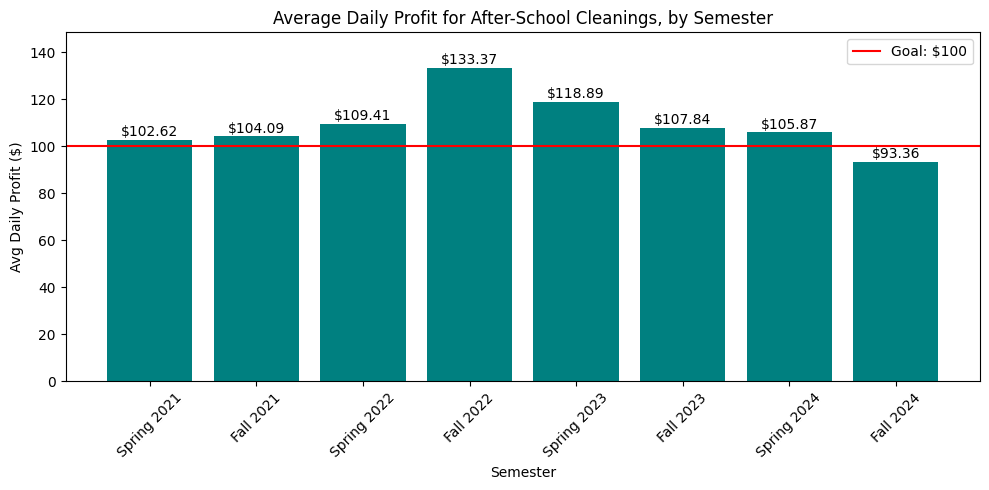

In [62]:
# Combine semester and year
df_new_net_sem['semester_label'] = df_new_net_sem['semester'] + ' ' + df_new_net_sem['year']

# Plot the bar graph
plt.figure(figsize=(10,5))
bars = plt.bar(df_new_net_sem['semester_label'], df_new_net_sem['avg_daily_profit'], color = 'teal')
plt.title('Average Daily Profit for After-School Cleanings, by Semester')
plt.xlabel('Semester')
plt.ylabel('Avg Daily Profit ($)')
plt.ylim(0, df_new_net_sem['avg_daily_profit'].max() + 15)

# Add horizontal line with legend to indicate target net income of $100
goal = 100
plt.axhline(y=goal, color='red', linestyle='-', linewidth=1.5, label=f'Goal: ${goal}')
plt.legend()

# Add labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.25,
        f"${height:.2f}",
        ha='center', va='bottom', fontsize=10
    )

plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()

plt.show()

It is clear that something significant happened in the Fall of 2024 that caused Kathy's Cleaning to dip below it's goal!

Let's narrow in on Fall 2024 and break down profit by day of the week.

In [65]:
# Narrow in on Fall 2024 and break down profit by day of the week.
query = """
WITH employee_hourly_pay AS (
    SELECT e.employee, 
        e.payroll_id, 
        e.date, 
        e.hours, 
        e.pay, 
        y.pay_per_hour, 
        (e.hours * y.pay_per_hour) AS labor_cost 
    FROM printouts_table AS e 
    JOIN pay_table AS y 
    ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE e.hours IS NOT NULL
),

labor_by_job AS (
    SELECT payroll_id,
        SUM(hours) AS total_hours,
        SUM(labor_cost) AS total_labor_cost
    FROM employee_hourly_pay
    GROUP BY payroll_id
),

calculated_profit AS (
    SELECT 
      j.date,
      j.week_of,
      j.day_of_week,
      j.payroll_id,
      j.job_pays AS daily_income,
      j.kathy AS daily_profit,
      l.total_hours,
      l.total_labor_cost,
      (j.job_pays - l.total_labor_cost) AS calculated_profit
    FROM payroll_table AS j
    JOIN labor_by_job AS l
    ON j.payroll_id = l.payroll_id
    WHERE job_name = 'COV SCHL'
        AND strftime('%m', week_of) NOT IN ('06', '07')
        AND job_pays BETWEEN 211 AND 230
),

profit_by_dow AS (
    SELECT 
        CASE
            WHEN strftime('%m', week_of) IN ('01', '02', '03', '04', '05') THEN 'Spring'
            WHEN strftime('%m', week_of) IN ('08', '09', '10', '11', '12') THEN 'Fall'
            ELSE 'Summer'
        END AS semester,
        strftime('%Y', week_of) AS year,
        day_of_week,
        ROUND(AVG(calculated_profit),2) AS avg_net_profit
    FROM calculated_profit
    GROUP BY 
        semester, 
        year, 
        CASE 
            WHEN day_of_week = 'Monday' THEN 1
            WHEN day_of_week = 'Tuesday' THEN 2
            WHEN day_of_week = 'Wednesday' THEN 3
            WHEN day_of_week = 'Thursday' THEN 4
            WHEN day_of_week = 'Friday' THEN 5
        END
    ORDER BY year, semester DESC
)

SELECT
    semester,
    year,
    day_of_week,
    avg_net_profit
FROM profit_by_dow
WHERE semester = 'Fall'
  AND year = '2024';
"""

df_new_net_dow_f24 = pd.read_sql(query, engine)
df_new_net_dow_f24

,semester,year,day_of_week,avg_net_profit
0,Fall,2024,Monday,92.53
1,Fall,2024,Tuesday,81.13
2,Fall,2024,Wednesday,109.60
3,Fall,2024,Thursday,92.14
4,Fall,2024,Friday,91.42


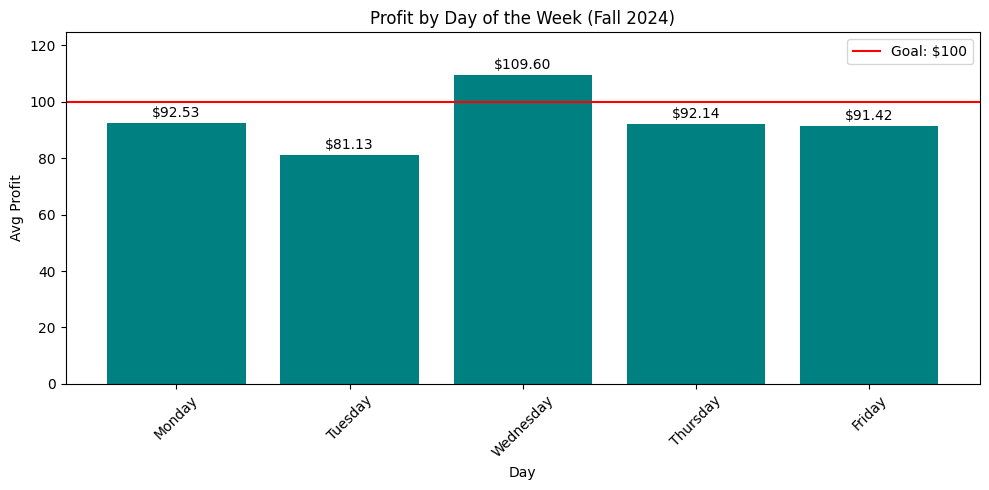

In [66]:
# Plot the bar graph
plt.figure(figsize=(10,5))
bars = plt.bar(df_new_net_dow_f24['day_of_week'], df_new_net_dow_f24['avg_net_profit'], color = 'teal')
plt.title('Profit by Day of the Week (Fall 2024)')
plt.xlabel('Day')
plt.ylabel('Avg Profit')
plt.ylim(0, df_new_net_dow_f24['avg_net_profit'].max() + 15)

# Add horizontal line with legend to indicate target net income of $100
goal = 100
plt.axhline(y=goal, color='red', linestyle='-', linewidth=1.5, label=f'Goal: ${goal}')
plt.legend()

# Add labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"${height:.2f}",
        ha='center', va='bottom', fontsize=10
    )

plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()

plt.show()

Only on Wednesdays did the business meet it's daily profit goal.

Now, let's compare previous semesters with the Fall of 2024 using four metrics:
1. Average total hours worked per day
2. Average number of employees per day
3. Unweighted average hourly wages of employees
4. Weighted average hourly wages of employees

**We want to see which of these metrics contributes most to the average daily profit.**

Note: Comparing the *unweighted*, or flat, average hourly wages of employees (#3) from one semester to the next tells us how hourly wages in general have changed over time.
On the other hand, the *weighted* average hourly wages of employees (#4) gives an accurate picture of how much the business is paying employees per hour. It takes into consideration the number of hours that each individual employee (each with a unique pay rate) is working.

In other words: Unweighted average (#3) treats all employees equally, regardless of hours worked. Weighted average (#4) reflects who actually worked more and thus had more impact on the total wage cost.

Now let's calculate our four metrics for comparing the semesters.

In [71]:
# Calculate all four averages by the semester
query = """
WITH daily_employees AS (
    SELECT 
        j.date,
        CASE
            WHEN strftime('%m', j.week_of) IN ('01','02','03','04','05') THEN 'Spring'
            WHEN strftime('%m', j.week_of) IN ('08','09','10','11','12') THEN 'Fall'
            ELSE 'Summer'
        END AS semester,
        strftime('%Y', j.week_of) AS year,
        SUM(e.hours) AS total_hours_per_day,
        COUNT(DISTINCT e.employee) AS num_employees,
        AVG(y.pay_per_hour) AS unweighted_avg_pay_per_hour,
        SUM(e.hours * y.pay_per_hour) * 1.0 / SUM(e.hours) AS weighted_avg_pay_per_hour
    FROM printouts_table AS e
    JOIN payroll_table AS j 
      ON e.payroll_id = j.payroll_id
    JOIN pay_table AS y
      ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE strftime('%m', j.week_of) NOT IN ('06','07')
    AND j.job_name = 'COV SCHL'
    AND j.job_pays BETWEEN 211 AND 230    
    GROUP BY j.date
)

SELECT 
    semester, 
    year, 
    ROUND(AVG(total_hours_per_day), 2) AS avg_hours_per_day, 
    ROUND(AVG(num_employees), 2) AS avg_num_employees_per_day, 
    ROUND(AVG(unweighted_avg_pay_per_hour), 2) AS unweighted_avg_hourly_wage,
    ROUND(AVG(weighted_avg_pay_per_hour), 2) AS weighted_avg_hourly_wage,
    CASE
        WHEN AVG(unweighted_avg_pay_per_hour) > AVG(weighted_avg_pay_per_hour) THEN "Yes"
        ELSE "No"
    END AS low_paid_workers_utilized_more
FROM daily_employees
GROUP BY semester, year
ORDER BY year, semester DESC;
"""
df_q1_averages = pd.read_sql(query, engine)
df_q1_averages

,semester,year,avg_hours_per_day,avg_num_employees_per_day,unweighted_avg_hourly_wage,weighted_avg_hourly_wage,low_paid_workers_utilized_more
0,Spring,2021,10.81,4.79,9.99,10.04,No
1,Fall,2021,10.49,4.92,10.41,10.63,No
2,Spring,2022,10.09,5.22,10.24,10.49,No
3,Fall,2022,7.55,3.99,10.97,11.41,No
4,Spring,2023,8.55,4.48,11.36,11.73,No
5,Fall,2023,9.82,5.53,11.08,11.33,No
6,Spring,2024,9.51,5.27,11.68,11.99,No
7,Fall,2024,11.02,5.39,12.01,12.45,No


These are the results of all four of our averages for comparison.

A fifth column, low_paid_workers_utilized_more, was added as well. This asks whether the unweighted average hourly pay was greater than the weighted hourly pay. In other words, *"Did the lower-paid employees work more hours than the higher-paid employees?"* In every case, the answer was "No," so we know that this was not a factor.

Now let's plot our four metrics to see which one effects daily profit the most.

To do this, we will first normalize the metrics to the same scale. Then we will put each of the four metrics on the same chart with average daily profit, looking to see which line has the most similar shape. We will use Pearson's r to quantify the stregnth of the relationship. 

- A value close to 1: strong positive correlation
- A value close to -1: strong negative correlation
- A value near 0: no correlation

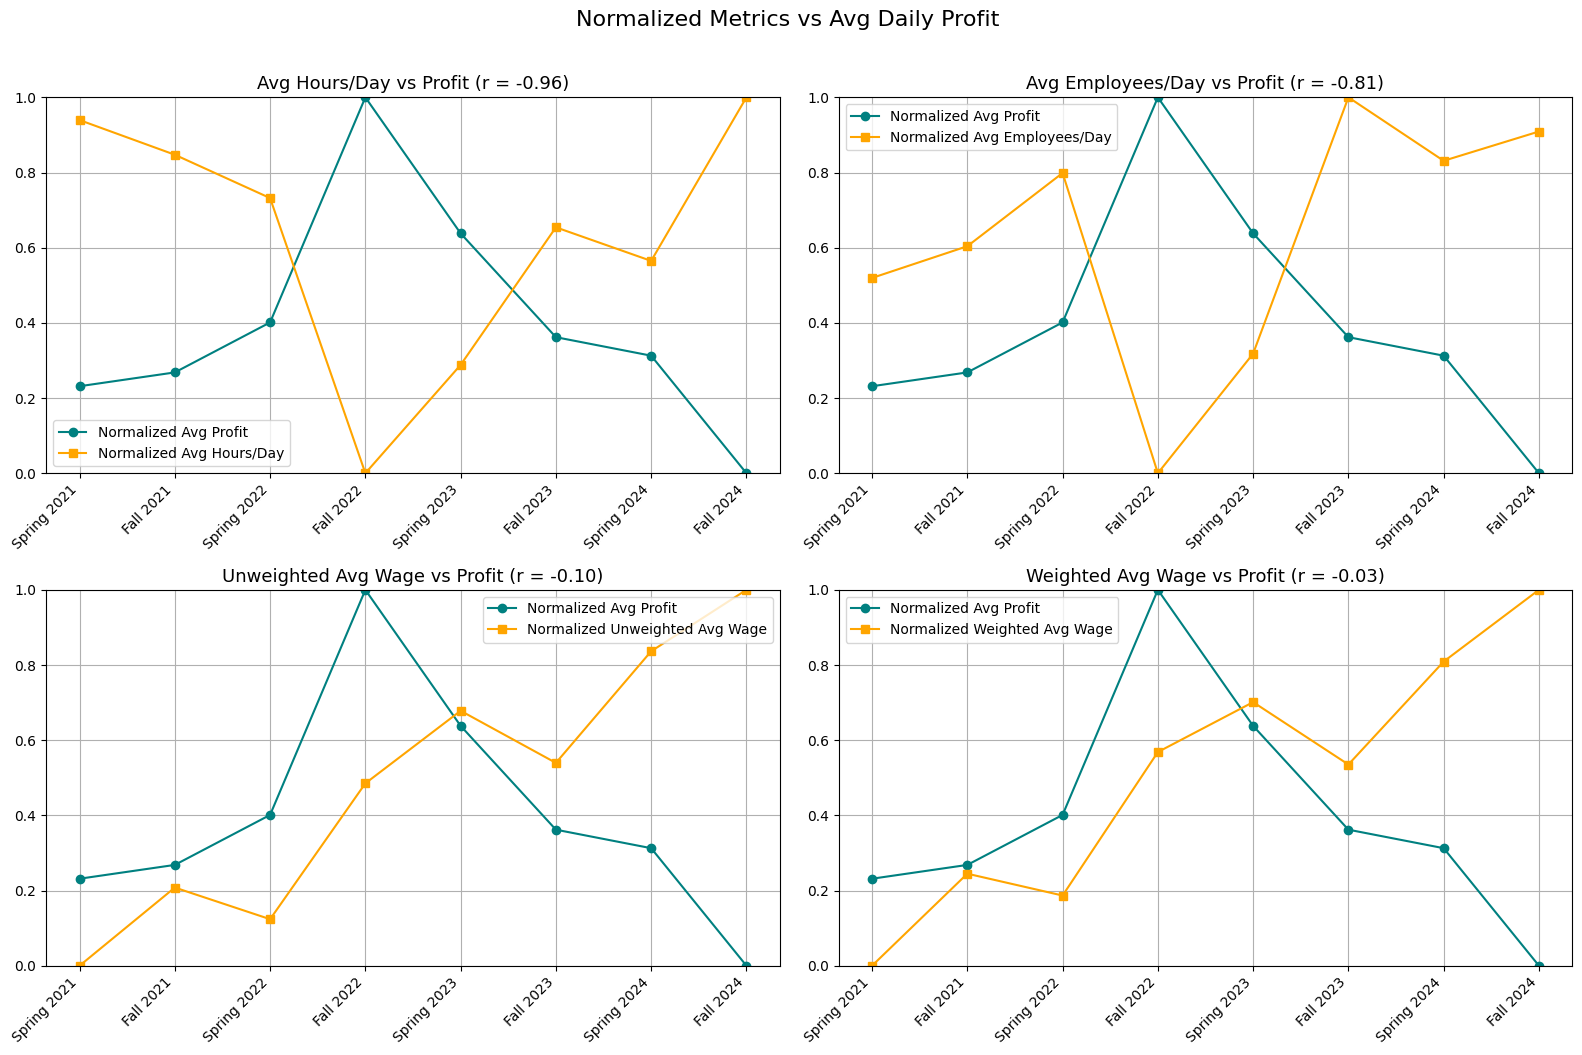

In [73]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Merge both dataframes to get profit and metrics in one place
df_merged = pd.merge(df_new_net_sem, df_q1_averages, on=['semester', 'year'])
df_merged['semester_label'] = df_merged['semester'] + ' ' + df_merged['year']

# Select columns to normalize
cols_to_normalize = ['avg_daily_profit', 'avg_hours_per_day', 
                     'avg_num_employees_per_day', 'unweighted_avg_hourly_wage', 
                     'weighted_avg_hourly_wage']

# Apply MinMax scaling
scaler = MinMaxScaler()
df_scaled = df_merged.copy()
df_scaled[cols_to_normalize] = scaler.fit_transform(df_merged[cols_to_normalize])

# Metrics for comparison
metrics = [
    ('avg_hours_per_day', 'Avg Hours/Day'),
    ('avg_num_employees_per_day', 'Avg Employees/Day'),
    ('unweighted_avg_hourly_wage', 'Unweighted Avg Wage'),
    ('weighted_avg_hourly_wage', 'Weighted Avg Wage')
]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

for i, (metric, title) in enumerate(metrics):
    ax = axs[i]
    
    # Plot normalized avg_daily_profit
    ax.plot(df_scaled['semester_label'], df_scaled['avg_daily_profit'], 
            label='Normalized Avg Profit', color='teal', marker='o')

    # Plot normalized metric
    ax.plot(df_scaled['semester_label'], df_scaled[metric], 
            label=f'Normalized {title}', color='orange', marker='s')

    # Calculate Pearson correlation coefficient
    r = np.corrcoef(df_merged['avg_daily_profit'], df_merged[metric])[0, 1]

    # Annotate correlation on plot
    ax.set_title(f"{title} vs Profit (r = {r:.2f})", fontsize=13)
    ax.set_xticks(range(len(df_scaled['semester_label'])))
    ax.set_xticklabels(df_scaled['semester_label'], rotation=45, ha='right')
    ax.set_ylim(0, 1)
    ax.legend()
    ax.grid(True)

# Final layout
plt.tight_layout()
plt.suptitle("Normalized Metrics vs Avg Daily Profit", fontsize=16, y=1.05)
plt.show()


It appears that the first metric, **average hours per day**, affects the profit the most. Notice how the shape of the yellow line in the first graph is almost the reverse of the green line. Also, Pearson's r is almost at -1 for this metric (r = -0.96). This means there is a strong negative relationship between average hours worked per day and average daily profit. We see that the average number of employees that work each day (the second graph) is also a major factor (r = -0.81). Whereas weighted average wage has almost no correlation to average daily profit (r = -0.03).

We can further confirm this by backing up and looking at the totals that went in to finding the average work hours: total hours worked each semester, and total worked days in each semester.

In [76]:
# Find total hours worked per semester, total days worked each semester, and avg hours worked per day by semester.
query = """
SELECT 
    CASE
        WHEN strftime('%m', e.week_of) IN ('01', '02', '03', '04', '05') THEN 'Spring'
        WHEN strftime('%m', e.week_of) IN ('08', '09', '10', '11', '12') THEN 'Fall'
        ELSE 'Summer'
    END AS semester,
    strftime('%Y', e.week_of) AS year,
    SUM(e.hours) AS total_hours_worked,
    COUNT(DISTINCT(j.payroll_id)) AS total_days_worked,
    SUM(e.hours) * 1.0 / COUNT(DISTINCT(j.payroll_id)) AS avg_hours_per_day
FROM printouts_table AS e
JOIN payroll_table AS j
ON e.payroll_id = j.payroll_id
WHERE j.job_name = 'COV SCHL'
AND j.job_pays BETWEEN 211 AND 230
AND strftime('%m', j.week_of) NOT IN ('06', '07')
AND e.hours IS NOT NULL
GROUP BY year, semester
ORDER BY year, semester DESC
"""
df_sem_preview = pd.read_sql(query, engine)
df_sem_preview

,semester,year,total_hours_worked,total_days_worked,avg_hours_per_day
0,Spring,2021,1027.301053,95,10.813695
1,Fall,2021,964.784211,92,10.486785
2,Spring,2022,968.683333,96,10.090451
3,Fall,2022,694.183333,92,7.545471
4,Spring,2023,803.930000,94,8.552447
5,Fall,2023,854.016159,87,9.816278
6,Spring,2024,875.283333,92,9.513949
7,Fall,2024,1047.260191,95,11.023791


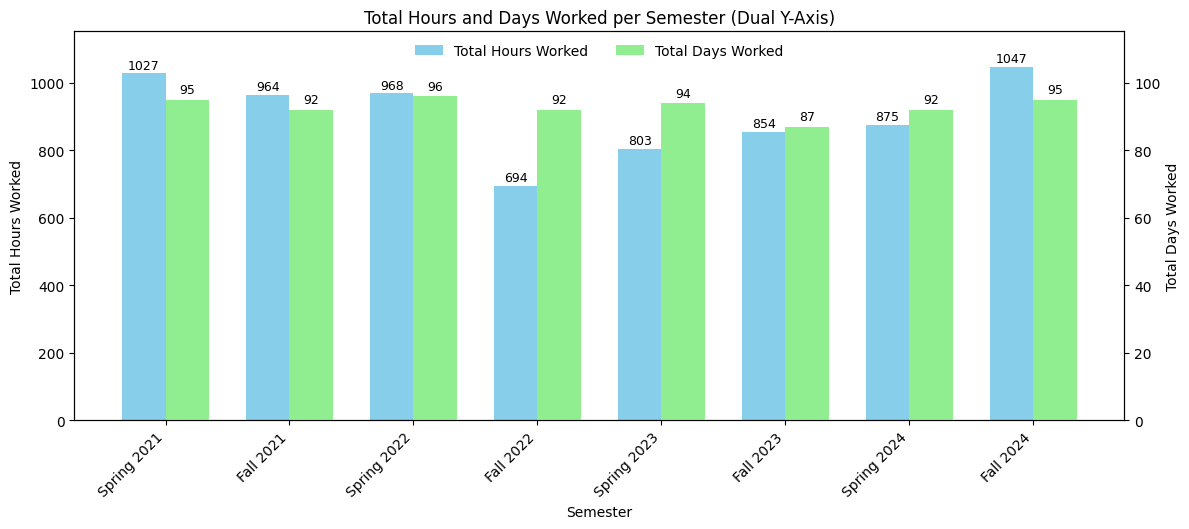

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Create semester label
df_sem_preview['semester_label'] = df_sem_preview['semester'] + ' ' + df_sem_preview['year']

# X-axis setup
x = np.arange(len(df_sem_preview['semester_label']))
bar_width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Y-axis: Total Hours Worked
bars1 = ax1.bar(x - bar_width/2, df_sem_preview['total_hours_worked'],
                width=bar_width, color='skyblue', label='Total Hours Worked')
ax1.set_ylabel('Total Hours Worked')
ax1.tick_params(axis='y')

# Right Y-axis: Total Days Worked
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width/2, df_sem_preview['total_days_worked'],
                width=bar_width, color='lightgreen', label='Total Days Worked')
ax2.set_ylabel('Total Days Worked')
ax2.tick_params(axis='y')

# Raise Y-limits to prevent legend from overlapping
ax1_max = max(df_sem_preview['total_hours_worked'])
ax1.set_ylim(0, ax1_max * 1.10)

ax2_max = max(df_sem_preview['total_days_worked'])
ax2.set_ylim(0, ax2_max * 1.20)

# Remove gridlines
ax1.grid(False)
ax2.grid(False)

# X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(df_sem_preview['semester_label'], rotation=45, ha='right')
ax1.set_xlabel('Semester')
ax1.set_title('Total Hours and Days Worked per Semester (Dual Y-Axis)')

# Bar labels: left axis
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 5, f"{int(height)}",
             ha='center', va='bottom', fontsize=9)

# Bar labels: right axis
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 1, f"{int(height)}",
             ha='center', va='bottom', fontsize=9)

# Combine legends manually
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2

# Place legend centered under title
ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2, frameon=False)

# Adjust layout to make space for legend
plt.tight_layout(rect=[0, 0, 1, 0.9])

plt.show()


You can see that the total days worked each semester (in green) varies only slightly. And yet, the total hours worked in Fall 2024 are significantly more than those worked in Fall 2022. Remember, these two semesters represent the highest daily profit (Fall 2022) and lowest daily profit (Fall 2024) by semester.

When we consider the "current conditions" aspect of our business question, the only factors of the four that we could change are number of hours worked and number of employees who work each day.

**Remember, the business question asks how many hours should employees be working. If we focus on this factor, number of hours, per day and per week, management can then decide not only how many total hours to give to employees, but the number of employees that should work each day to meet that goal.**

So, we want to determine how many hours employees should be working each day. Let's summarize what we have learned so far for Fall 2024 (excluding unweighted and weighted hourly wage since these are barely a factor):
1. The job pays the business **\\$230 per day**.
2. The *profit goal* after paying employees is **\\$100 per day**.
3. The *total hours* worked per day on average is **11.34 hours**.
4. The *number of employees* who work per day on average is **5.39 workers**.

These are the current conditions. The question now is how do we change total hours in order to attain profit goal. In other words, we want to change #3 in order to reach #2.

Here is the formula to solve for Maximum Average Total Hours for all Employees per Day:

    Maximum Average Total Hours Allowed per Day = (Job Pays – Profit Goal) / Avg Hourly Wage
    Maximum Average Total Hours Allowed per Day = (230 - 100) / Avg Hourly Wage


In [83]:
query = """
WITH cte AS (
    SELECT 
        j.date,
        CASE
            WHEN strftime('%m', j.week_of) IN ('01','02','03','04','05') THEN 'Spring'
            WHEN strftime('%m', j.week_of) IN ('08','09','10','11','12') THEN 'Fall'
            ELSE 'Summer'
        END AS semester,
        strftime('%Y', j.week_of) AS year,
        SUM(e.hours) AS total_hours_per_day,
        COUNT(DISTINCT e.employee) AS num_employees,
        AVG(y.pay_per_hour) AS unweighted_avg_pay_per_hour,
        SUM(e.hours * y.pay_per_hour) * 1.0 / SUM(e.hours) AS weighted_avg_pay_per_hour
    FROM printouts_table AS e
    JOIN payroll_table AS j 
      ON e.payroll_id = j.payroll_id
    JOIN pay_table AS y
      ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE strftime('%m', j.week_of) NOT IN ('06','07')
    AND j.job_name = 'COV SCHL'
    AND j.job_pays BETWEEN 211 AND 230    
    GROUP BY j.date
)

SELECT
    semester,
    year,
    130 / unweighted_avg_pay_per_hour AS max_total_hours_per_day_unweighted,
    130 / weighted_avg_pay_per_hour AS max_total_hours_per_day_weighted
FROM cte
GROUP BY year, semester
ORDER BY year, semester DESC
"""

df = pd.read_sql(query, engine)
df

,semester,year,max_total_hours_per_day_unweighted,max_total_hours_per_day_weighted
0,Spring,2021,12.713936,12.746427
1,Fall,2021,11.555556,11.573927
2,Spring,2022,10.833333,10.833333
3,Fall,2022,11.353712,10.999318
4,Spring,2023,10.684932,10.247893
5,Fall,2023,11.935731,11.757770
6,Spring,2024,10.196078,10.166389
7,Fall,2024,11.099253,11.069843


We have a couple options for how we can approach this:
    
- **Option 1**: Calculate a set number of hours that every employee must work each day.
    
    If we follow Option 1, each employee would be required to work, for example, 2 hours per day. Alternatively, each employee could be required to work, for example, 5 minutes less per day then their average.

Here is the formula for distributing hours across employees:

    Hours per Employee = Maximum Average Total Hours Allowed per Day / Avg # of Employees per Day

However, this option fails to recognize the unique schedules of each employee. Some are only able to work about one hour per day. Others can only work certain days of the week. Besides, the business want to maximize the hours for employees that have a lower hourly wage.

- **Option 2**: Take into consideration additional current conditions to reach a more accurate and reasonable picture of the change in hours that need to take place.

    In speaking with the business, "additional current conditions" that should be considered include:
  
    - As mentioned above, the business wants to (and already does) maximize the hours of employees who have a lower hourly wage, as this is more profitable.
    - Employees who are students (generally those who have a lower hourly wage) have strict hours that they are able to work due to their individual after-school schedules.
    - The assistant manager's number of hours cannot change much due to job responsibilities.

    So that means we have two categories of workers, "students" and "assistant manager", whose number of work hours should stay about the same. This leaves one other category of employees, "adults", whose total hours can change. Adults are employees who are not students and do not hold a management position.

It is not reasonable to limit the assistant manager's hours to only two hours each day. Nor is it possible to increase all the student's hours as they are already maxed out. The adult employee's hours, however, are adjustable. These additional factors must be considered. 

Therefore, we will go with **Option #2**.

This means dividing employees into the following buckets: "students," "adults," and "assistant manager."
We know who the assistant manager is. But how do we define the others?

- A "student" is an employee who is under 20 years of age and who does not work at houses, as this requires special training. (He/she mostly only works at the school.)
- An "adult" is a non-management employee who is 20 years of age or older. Most of them also work at houses.

We will identify the groups as follows: 
- "assistant mgr": employee "Brian"
- "student": employee who is under age 20 and who does not clean at houses.
- "adult": all other employees

Let's begin by finding all the employees who worked at Covenant Academy in Fall 2024. We will include their ages (as of the start of the semester), current hourly wage, and whether or not they worked at houses.

In [88]:
# Find current employees, along with their current age, pay per hour.
query = """
SELECT 
    e.employee, 
    m.birthday,
    CAST(strftime('%Y', '2024-08-05')AS INTEGER) - CAST(strftime('%Y', m.birthday)AS INTEGER)  AS age,  -- find age as of start of semester
    y.pay_per_hour
FROM printouts_table AS e
JOIN pay_table AS y
  ON e.week_of = y.week_of AND e.employee = y.employee
JOIN employee_table AS m
  ON y.employee = m.employee_id
WHERE e.week_of >= '2024-08-12'                                                                         -- pay/hr based on second week of semester to reflect a wage increase 
  AND e.customer_id = 6                                                                                 -- customer id for school
GROUP BY e.employee, y.pay_per_hour
ORDER BY m.birthday
"""
df_employee_age_pay = pd.read_sql(query, engine)
df_employee_age_pay

,employee,birthday,age,pay_per_hour
0,Cindy,1956-06-01 00:00:00.000000,68,13.00
1,Janet T,1965-04-10 00:00:00.000000,59,12.00
2,Lisa,1966-11-11 00:00:00.000000,58,12.00
3,Brian,1978-03-22 00:00:00.000000,46,14.00
4,Janet,1985-09-15 00:00:00.000000,39,12.50
5,MaKayla,2006-05-15 00:00:00.000000,18,10.35
6,Spencer,2007-06-26 00:00:00.000000,17,10.35
7,MaKenna,2008-06-20 00:00:00.000000,16,10.00
8,Asa,2009-05-06 00:00:00.000000,15,9.50


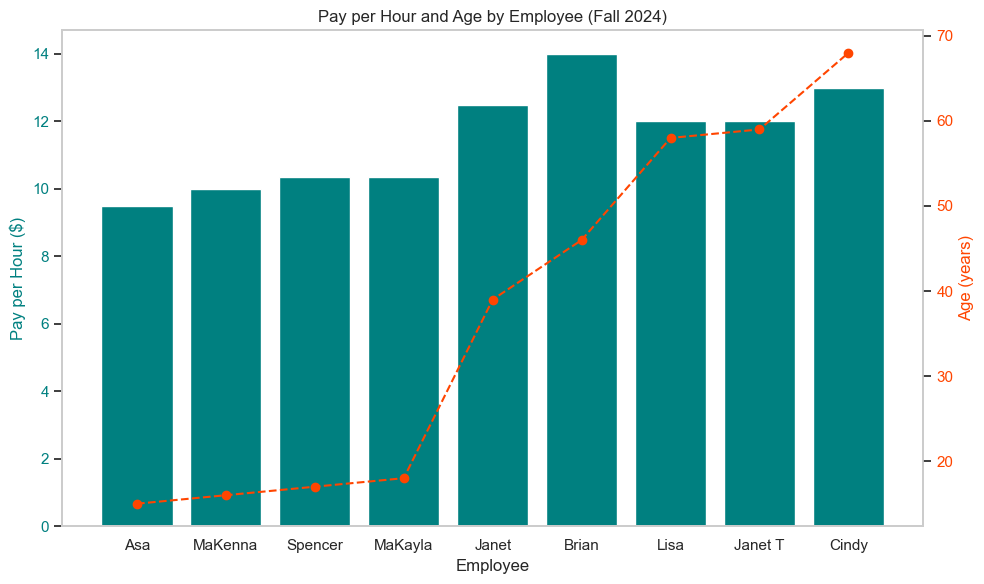

In [247]:
# graph the age and pay of each employee
# Sort by age or pay if desired
df_sorted = df_employee_age_pay.sort_values(by='age')

# Create plot with dual axes
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart: Pay per hour
bars = ax1.bar(df_sorted['employee'], df_sorted['pay_per_hour'], color='teal')
ax1.set_ylabel('Pay per Hour ($)', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
ax1.set_xlabel('Employee')
ax1.set_title('Pay per Hour and Age by Employee (Fall 2024)')

# Line chart: Age in years on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df_sorted['employee'], df_sorted['age'], color='orangered', marker='o', linestyle='--', label='Age (yrs)')
ax2.set_ylabel('Age (years)', color='orangered')
ax2.tick_params(axis='y', labelcolor='orangered')

# Remove all grid lines
ax1.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()



Now, we will divide the current employees into buckets. We will first find all employees who have ever been trained at cleaning houses. We will then join this list with the current employees list we queried above to find which current employees clean at houses. Finally, we will use that to separate the current employees into buckets.  

Remember, a 'student' is an employee under the age of 20 who does not clean houses. The 'assistant manager' is Brian. An 'adult' employee is everyone else (not including the boss, of course).

In [92]:
# Organize each current employee into their respective 'bucket.'
query = """
-- Code above, showing current employees, along with their current age, pay per hour
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

-- Find who has cleaned at houses
house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

-- Do a full join of the two cte's
summary_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

--Determine which current employees clean houses.
final_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_cte
    WHERE employee IS NOT NULL
) 

-- Organize each current employee into their respective 'bucket.'
SELECT 
    employee,
    pay_per_hour,
    CASE
        WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
        WHEN employee = 'Brian' THEN 'assistant mgr'
        ELSE 'adult'
    END AS bucket
FROM final_cte
ORDER BY 
    CASE
        WHEN bucket = 'student' THEN 1
        WHEN bucket = 'adult' THEN 2
        WHEN bucket = 'assistant mgr' THEN 3
    END;
"""

df = pd.read_sql(query, engine)
df

,employee,pay_per_hour,bucket
0,Asa,9.50,student
1,MaKayla,10.35,student
2,MaKenna,10.00,student
3,Spencer,10.35,student
4,Cindy,13.00,adult
5,Janet,12.50,adult
6,Janet T,12.00,adult
7,Lisa,12.00,adult
8,Brian,14.00,assistant mgr


Now let's see how employees are in each bucket.

In [94]:
# Count the number of employees in each bucket
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
)

SELECT
    bucket,
    COUNT(bucket) AS employee_count
FROM bucket_cte
GROUP BY bucket
ORDER BY 
    CASE
        WHEN bucket = 'student' THEN 1
        WHEN bucket = 'adult' THEN 2
        WHEN bucket = 'assistant mgr' THEN 3
    END;
"""

df_q1_bucket_count = pd.read_sql(query, engine)
df_q1_bucket_count

,bucket,employee_count
0,student,4
1,adult,4
2,assistant mgr,1


Let's graph it...

<function matplotlib.pyplot.show(close=None, block=None)>

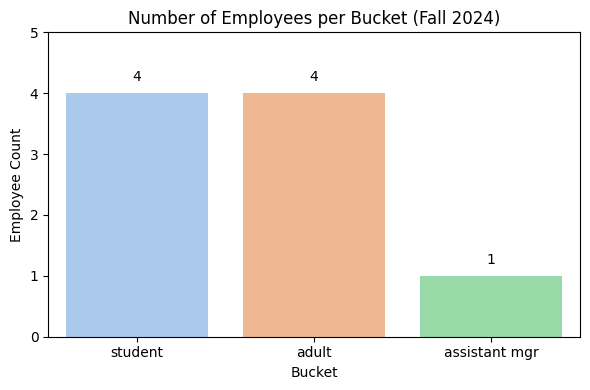

In [96]:
# Plot the number of employees per bucket

import seaborn as sns
# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(data=df_q1_bucket_count, x='bucket', y='employee_count', palette='pastel')

# Raise y-axis limit above the max count
max_count = df_q1_bucket_count['employee_count'].max()
plt.ylim(0, max_count + 1)

# Add value labels on top of bars
for index, row in df_q1_bucket_count.iterrows():
    plt.text(index, row['employee_count'] + 0.2, row['employee_count'], ha='center')

plt.title('Number of Employees per Bucket (Fall 2024)')
plt.ylabel('Employee Count')
plt.xlabel('Bucket')
plt.tight_layout()
plt.show

In [97]:
# Find each employee's weekly schedule; average hours and number of days worked during semester per day of week
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
)

SELECT
    e.employee,
    b.bucket,
    e.day_of_week,
    ROUND(AVG(e.hours), 2) AS avg_hours,
    COUNT(e.day_of_week) AS num_days_in_semester_worked
FROM printouts_table AS e
JOIN bucket_cte AS b 
  ON e.employee = b.employee
JOIN payroll_table AS j
  ON e.payroll_id = j.payroll_id
WHERE e.week_of >= '2024-08-05'
  AND e.job_name = 'COV SCHL'
  AND j.job_pays BETWEEN 211 AND 230
  AND e.hours IS NOT NULL
GROUP BY  e.employee, e.day_of_week
ORDER BY 
    CASE
        WHEN b.bucket = 'assistant mgr' THEN 1
        WHEN b.bucket = 'adult' THEN 2
        WHEN b.bucket = 'student' THEN 3
    END,
    e.employee,
    CASE
        WHEN e.day_of_week = 'Monday' THEN 1
        WHEN e.day_of_week = 'Tuesday' THEN 2
        WHEN e.day_of_week = 'Wednesday' THEN 3
        WHEN e.day_of_week = 'Thursday' THEN 4
        WHEN e.day_of_week = 'Friday' THEN 5
    END;
"""

df_cov_schedules = pd.read_sql(query, engine)
df_cov_schedules.head(8)

,employee,bucket,day_of_week,avg_hours,num_days_in_semester_worked
0,Brian,assistant mgr,Monday,3.15,19
1,Brian,assistant mgr,Tuesday,3.84,19
2,Brian,assistant mgr,Wednesday,3.59,18
3,Brian,assistant mgr,Thursday,3.23,19
4,Brian,assistant mgr,Friday,3.26,19
5,Cindy,adult,Monday,2.78,9
6,Cindy,adult,Tuesday,2.97,13
7,Cindy,adult,Wednesday,2.55,9


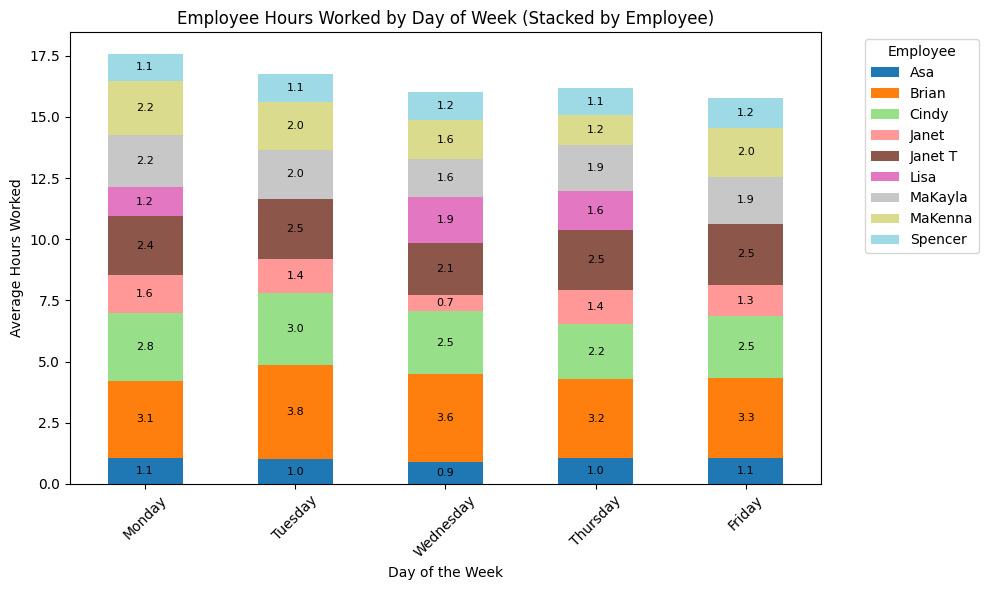

In [98]:
# Plot the above as a stacked bar chart

# Ensure days are in correct weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_cov_schedules['day_of_week'] = pd.Categorical(df_cov_schedules['day_of_week'], categories=day_order, ordered=True)

# Pivot table for stacked bar chart:
# Rows = day_of_week, Columns = employee, Values = avg_hours
pivot_df = df_cov_schedules.pivot_table(index='day_of_week', columns='employee', values='avg_hours', fill_value=0, observed=False)

# Create stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')

# Annotate each bar segment with avg_hours value
for i, day in enumerate(pivot_df.index):
    y_offset = 0
    for student in pivot_df.columns:
        value = pivot_df.loc[day, student]
        if value > 0:
            ax.text(
                i,                         # x-position
                y_offset + value / 2,      # y-position (middle of segment)
                f'{value:.1f}',            # label
                ha='center',
                va='center',
                fontsize=8,
                color='black'
            )
            y_offset += value              # move up for next stacked segment

# Plot stacked bar chart
plt.title('Employee Hours Worked by Day of Week (Stacked by Employee)')
plt.ylabel('Average Hours Worked')
plt.xlabel('Day of the Week')
plt.legend(title='Employee', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

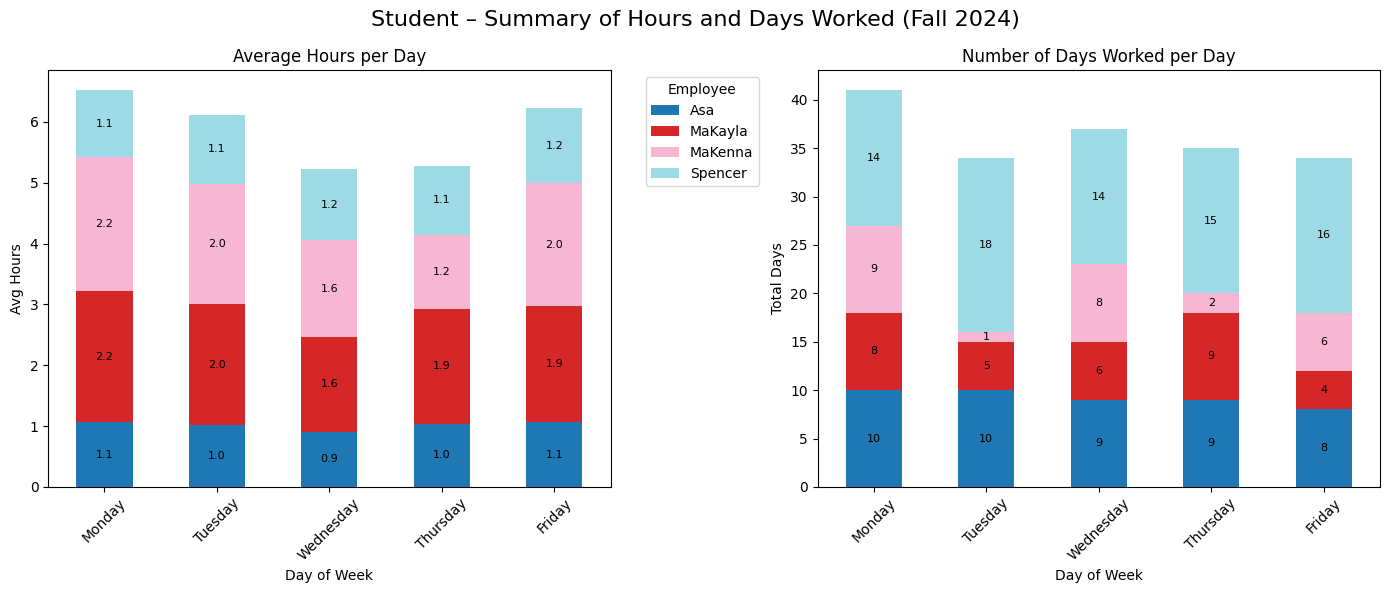

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter to one bucket
bucket_name = 'student'
df_bucket = df_cov_schedules[df_cov_schedules['bucket'] == bucket_name].copy()

# Ensure correct weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_bucket.loc[:, 'day_of_week'] = pd.Categorical(df_bucket['day_of_week'], categories=day_order, ordered=True)

# Pivot tables
pivot_avg_hours = df_bucket.pivot_table(
    index='day_of_week', columns='employee', values='avg_hours', fill_value=0, observed=False
).reindex(day_order)

pivot_days_worked = df_bucket.pivot_table(
    index='day_of_week', columns='employee', values='num_days_in_semester_worked', fill_value=0, observed=False
).reindex(day_order)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

fig.suptitle(f"{bucket_name.title()} – Summary of Hours and Days Worked (Fall 2024)", fontsize=16)

# --- Plot 1: Avg Hours ---
pivot_avg_hours.plot(kind='bar', stacked=True, ax=axes[0], colormap='tab20')
axes[0].set_title(f'Average Hours per Day')
axes[0].set_ylabel('Avg Hours')
axes[0].set_xlabel('Day of Week')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Employee', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels to Plot 1
for i, day in enumerate(pivot_avg_hours.index):
    y_offset = 0
    for emp in pivot_avg_hours.columns:
        value = pivot_avg_hours.loc[day, emp]
        if value > 0:
            axes[0].text(
                i, y_offset + value / 2,
                f'{value:.1f}',
                ha='center', va='center', fontsize=8, color='black'
            )
            y_offset += value

# --- Plot 2: Num Days Worked ---
pivot_days_worked.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab20')
axes[1].set_title(f'Number of Days Worked per Day')
axes[1].set_ylabel('Total Days')
axes[1].set_xlabel('Day of Week')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend().set_visible(False)  # optional

# Add labels to Plot 2
for i, day in enumerate(pivot_days_worked.index):
    y_offset = 0
    for emp in pivot_days_worked.columns:
        value = pivot_days_worked.loc[day, emp]
        if value > 0:
            axes[1].text(
                i, y_offset + value / 2,
                f'{value:.0f}',  # no decimal for counts
                ha='center', va='center', fontsize=8, color='black'
            )
            y_offset += value

plt.tight_layout()
plt.show()


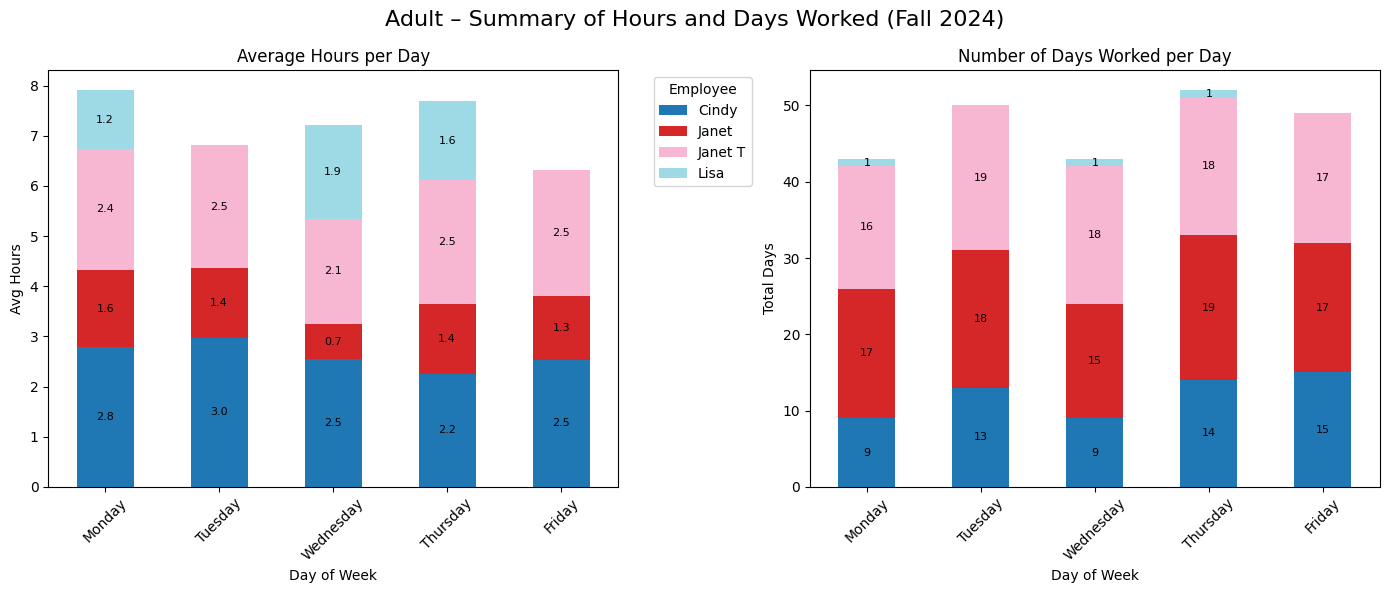

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter to one bucket
bucket_name = 'adult'
df_bucket = df_cov_schedules[df_cov_schedules['bucket'] == bucket_name].copy()

# Ensure correct weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_bucket.loc[:, 'day_of_week'] = pd.Categorical(df_bucket['day_of_week'], categories=day_order, ordered=True)

# Pivot tables
pivot_avg_hours = df_bucket.pivot_table(
    index='day_of_week', columns='employee', values='avg_hours', fill_value=0, observed=False
).reindex(day_order)

pivot_days_worked = df_bucket.pivot_table(
    index='day_of_week', columns='employee', values='num_days_in_semester_worked', fill_value=0, observed=False
).reindex(day_order)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

fig.suptitle(f"{bucket_name.title()} – Summary of Hours and Days Worked (Fall 2024)", fontsize=16)

# --- Plot 1: Avg Hours ---
pivot_avg_hours.plot(kind='bar', stacked=True, ax=axes[0], colormap='tab20')
axes[0].set_title(f'Average Hours per Day')
axes[0].set_ylabel('Avg Hours')
axes[0].set_xlabel('Day of Week')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Employee', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels to Plot 1
for i, day in enumerate(pivot_avg_hours.index):
    y_offset = 0
    for emp in pivot_avg_hours.columns:
        value = pivot_avg_hours.loc[day, emp]
        if value > 0:
            axes[0].text(
                i, y_offset + value / 2,
                f'{value:.1f}',
                ha='center', va='center', fontsize=8, color='black'
            )
            y_offset += value

# --- Plot 2: Num Days Worked ---
pivot_days_worked.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab20')
axes[1].set_title(f'Number of Days Worked per Day')
axes[1].set_ylabel('Total Days')
axes[1].set_xlabel('Day of Week')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend().set_visible(False)  # optional

# Add labels to Plot 2
for i, day in enumerate(pivot_days_worked.index):
    y_offset = 0
    for emp in pivot_days_worked.columns:
        value = pivot_days_worked.loc[day, emp]
        if value > 0:
            axes[1].text(
                i, y_offset + value / 2,
                f'{value:.0f}',  # no decimal for counts
                ha='center', va='center', fontsize=8, color='black'
            )
            y_offset += value

plt.tight_layout()
plt.show()


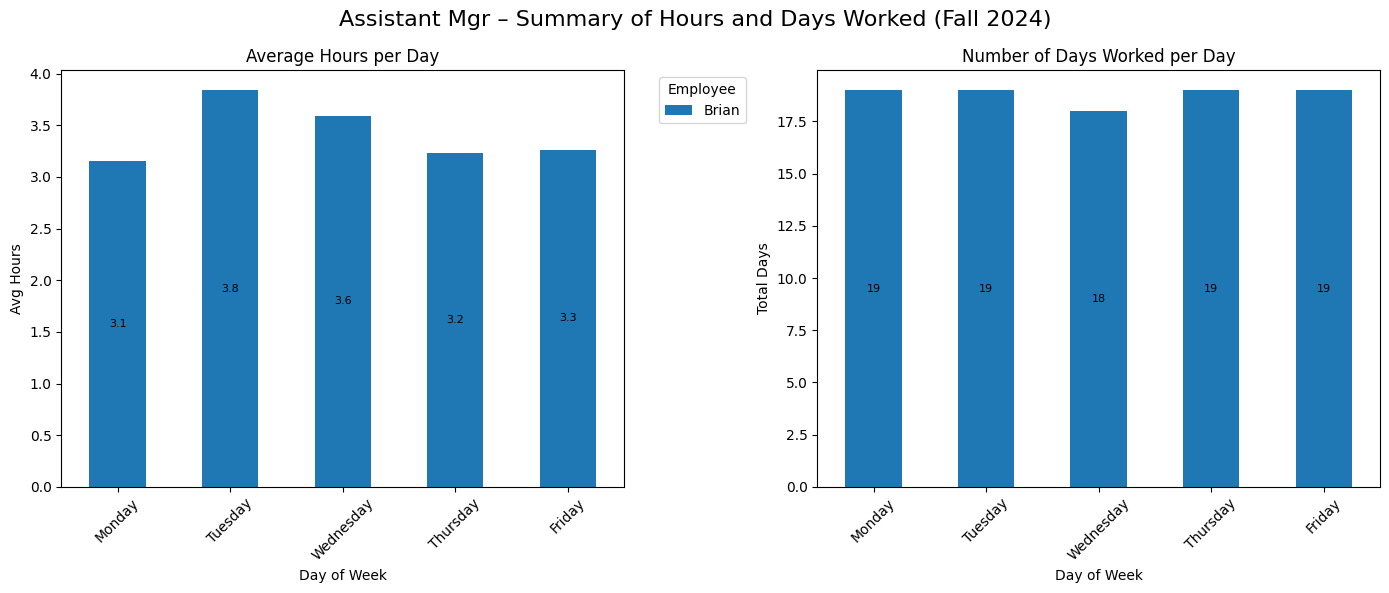

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter to one bucket
bucket_name = 'assistant mgr'
df_bucket = df_cov_schedules[df_cov_schedules['bucket'] == bucket_name].copy()

# Ensure correct weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_bucket.loc[:, 'day_of_week'] = pd.Categorical(df_bucket['day_of_week'], categories=day_order, ordered=True)

# Pivot tables
pivot_avg_hours = df_bucket.pivot_table(
    index='day_of_week', columns='employee', values='avg_hours', fill_value=0, observed=False
).reindex(day_order)

pivot_days_worked = df_bucket.pivot_table(
    index='day_of_week', columns='employee', values='num_days_in_semester_worked', fill_value=0, observed=False
).reindex(day_order)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

fig.suptitle(f"{bucket_name.title()} – Summary of Hours and Days Worked (Fall 2024)", fontsize=16)

# --- Plot 1: Avg Hours ---
pivot_avg_hours.plot(kind='bar', stacked=True, ax=axes[0], colormap='tab20')
axes[0].set_title(f'Average Hours per Day')
axes[0].set_ylabel('Avg Hours')
axes[0].set_xlabel('Day of Week')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Employee', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels to Plot 1
for i, day in enumerate(pivot_avg_hours.index):
    y_offset = 0
    for emp in pivot_avg_hours.columns:
        value = pivot_avg_hours.loc[day, emp]
        if value > 0:
            axes[0].text(
                i, y_offset + value / 2,
                f'{value:.1f}',
                ha='center', va='center', fontsize=8, color='black'
            )
            y_offset += value

# --- Plot 2: Num Days Worked ---
pivot_days_worked.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab20')
axes[1].set_title(f'Number of Days Worked per Day')
axes[1].set_ylabel('Total Days')
axes[1].set_xlabel('Day of Week')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend().set_visible(False)  # optional

# Add labels to Plot 2
for i, day in enumerate(pivot_days_worked.index):
    y_offset = 0
    for emp in pivot_days_worked.columns:
        value = pivot_days_worked.loc[day, emp]
        if value > 0:
            axes[1].text(
                i, y_offset + value / 2,
                f'{value:.0f}',  # no decimal for counts
                ha='center', va='center', fontsize=8, color='black'
            )
            y_offset += value

plt.tight_layout()
plt.show()


In [102]:
# total average hours worked per day_of_week per bucket
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
),

daily_hours AS (
    SELECT
        b.bucket,
        e.week_of,
        e.day_of_week,
        SUM(e.hours) AS total_hours_that_day
    FROM printouts_table AS e
    JOIN bucket_cte AS b 
      ON e.employee = b.employee
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    WHERE e.week_of >= '2024-08-05'
      AND e.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230
      AND e.hours IS NOT NULL
    GROUP BY b.bucket, e.week_of, e.day_of_week
),

avg_daily_totals AS (
    SELECT
        day_of_week,
        bucket,
        ROUND(AVG(total_hours_that_day), 2) AS avg_total_hours_worked
    FROM daily_hours
    GROUP BY bucket, day_of_week
)

SELECT *
FROM avg_daily_totals
ORDER BY 
    CASE day_of_week
        WHEN 'Monday' THEN 1
        WHEN 'Tuesday' THEN 2
        WHEN 'Wednesday' THEN 3
        WHEN 'Thursday' THEN 4
        WHEN 'Friday' THEN 5
    END,
    CASE bucket
        WHEN 'student' THEN 1
        WHEN 'adult' THEN 2
        WHEN 'assistant mgr' THEN 3
    END;
"""

df_q1_bucket_avg_total_hours_per_dow = pd.read_sql(query, engine)
df_q1_bucket_avg_total_hours_per_dow

,day_of_week,bucket,avg_total_hours_worked
0,Monday,student,3.71
1,Monday,adult,5.36
2,Monday,assistant mgr,3.15
3,Tuesday,student,2.36
4,Tuesday,adult,5.79
5,Tuesday,assistant mgr,3.84
6,Wednesday,student,2.92
7,Wednesday,adult,3.85
8,Wednesday,assistant mgr,3.59
9,Thursday,student,2.70


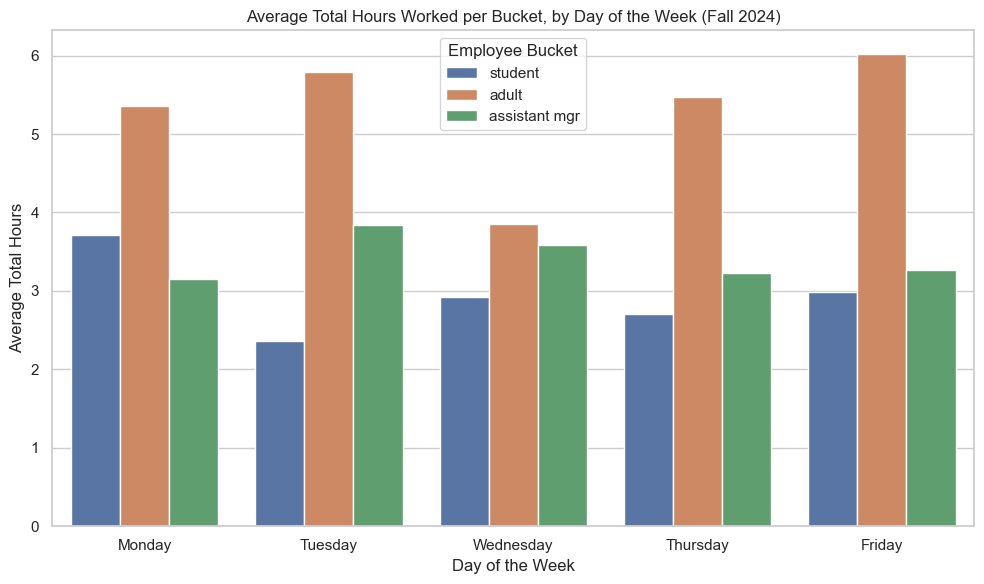

In [103]:
# PLot the total average hours worked per day_of_week per bucket
# Set plot style
sns.set(style="whitegrid")

# Create barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_q1_bucket_avg_total_hours_per_dow, x='day_of_week', y='avg_total_hours_worked', hue='bucket')

# Customize labels and title
plt.title('Average Total Hours Worked per Bucket, by Day of the Week (Fall 2024)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Hours')
plt.legend(title='Employee Bucket')

# Show plot
plt.tight_layout()
plt.show()

As a side note, it is interesting, from this graph above, that less hours are worked on Wednesdays. Let's see what the Fall 2024 profit is by day of the week and how this is reflected.

In [105]:
# Break down Fall 2024 profit by day of the week.
query = """
WITH employee_hourly_pay AS (
    SELECT e.employee, 
        e.payroll_id, 
        e.date, 
        e.hours, 
        e.pay, 
        y.pay_per_hour, 
        (e.hours * y.pay_per_hour) AS labor_cost 
    FROM printouts_table AS e 
    JOIN pay_table AS y 
    ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE e.hours IS NOT NULL
),

labor_by_job AS (
    SELECT payroll_id,
        SUM(hours) AS total_hours,
        SUM(labor_cost) AS total_labor_cost
    FROM employee_hourly_pay
    GROUP BY payroll_id
),

calculated_profit AS (
    SELECT 
      j.date,
      j.week_of,
      j.day_of_week,
      j.payroll_id,
      j.job_pays AS daily_income,
      j.kathy AS daily_profit,
      l.total_hours,
      l.total_labor_cost,
      (j.job_pays - l.total_labor_cost) AS calculated_profit
    FROM payroll_table AS j
    JOIN labor_by_job AS l
    ON j.payroll_id = l.payroll_id
    WHERE job_name = 'COV SCHL'
        AND strftime('%m', week_of) NOT IN ('06', '07')
        AND job_pays BETWEEN 211 AND 230
),

profit_by_dow AS (
    SELECT 
        CASE
            WHEN strftime('%m', week_of) IN ('01', '02', '03', '04', '05') THEN 'Spring'
            WHEN strftime('%m', week_of) IN ('08', '09', '10', '11', '12') THEN 'Fall'
            ELSE 'Summer'
        END AS semester,
        strftime('%Y', week_of) AS year,
        day_of_week,
        ROUND(AVG(calculated_profit),2) AS avg_net_profit
    FROM calculated_profit
    GROUP BY 
        semester, 
        year, 
        CASE 
            WHEN day_of_week = 'Monday' THEN 1
            WHEN day_of_week = 'Tuesday' THEN 2
            WHEN day_of_week = 'Wednesday' THEN 3
            WHEN day_of_week = 'Thursday' THEN 4
            WHEN day_of_week = 'Friday' THEN 5
        END
    ORDER BY year, semester DESC
)

SELECT
    semester,
    year,
    day_of_week,
    avg_net_profit
FROM profit_by_dow
WHERE semester = 'Fall'
  AND year = '2024';
"""

df_new_net_dow_f24 = pd.read_sql(query, engine)
df_new_net_dow_f24

,semester,year,day_of_week,avg_net_profit
0,Fall,2024,Monday,92.53
1,Fall,2024,Tuesday,81.13
2,Fall,2024,Wednesday,109.60
3,Fall,2024,Thursday,92.14
4,Fall,2024,Friday,91.42


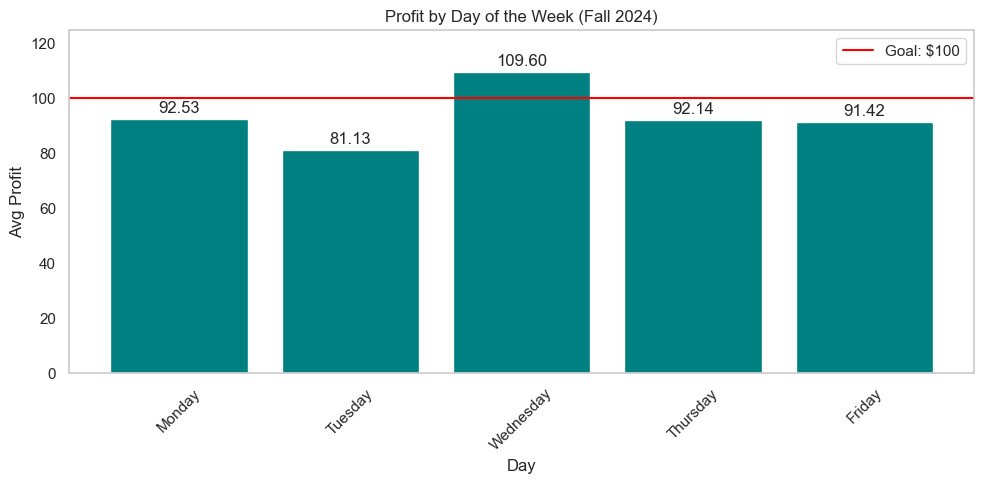

In [106]:
# Plot the bar graph
plt.figure(figsize=(10,5))
bars = plt.bar(df_new_net_dow_f24['day_of_week'], df_new_net_dow_f24['avg_net_profit'], color = 'teal')
plt.title('Profit by Day of the Week (Fall 2024)')
plt.xlabel('Day')
plt.ylabel('Avg Profit')
plt.ylim(0, df_new_net_dow_f24['avg_net_profit'].max() + 15)

# Add horizontal line with legend to indicate target net income of $100
goal = 100
plt.axhline(y=goal, color='red', linestyle='-', linewidth=1.5, label=f'Goal: ${goal}')
plt.legend()

# Add labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{height:.2f}",
        ha='center', va='bottom', fontsize=12
    )

plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()

plt.show()

Clearly, working less hours on Wednesday affects the profit, as that is the only day of the week that exceeds the daily profit goal.

Returning now to the task at hand, not every week has 5 school days. There are many weeks that have days off due to holidays. Partial weeks will skew the averages when figuring weekly average. So, we should figure the average for hypothetical full weeks, by finding the sum of the average of each day of the week.

In [109]:
# find the sum of the average total hours worked, per week, per bucket
# divide by five to get the average per day
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
),

daily_hours AS (
    SELECT
        b.bucket,
        e.week_of,
        e.day_of_week,
        SUM(e.hours) AS total_hours_that_day
    FROM printouts_table AS e
    JOIN bucket_cte AS b 
      ON e.employee = b.employee
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    WHERE e.week_of >= '2024-08-05'
      AND e.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230
      AND e.hours IS NOT NULL
    GROUP BY b.bucket, e.week_of, e.day_of_week
),

avg_daily_totals AS (
    SELECT
        day_of_week,
        bucket,
        AVG(total_hours_that_day) AS avg_total_hours_worked
    FROM daily_hours
    GROUP BY bucket, day_of_week
)

SELECT 
    bucket,
    ROUND(SUM(avg_total_hours_worked), 2) AS avg_total_weekly_hours_worked,
    ROUND(SUM(avg_total_hours_worked) / 5, 2) AS avg_total_daily_hours_worked
FROM avg_daily_totals
GROUP BY bucket
ORDER BY 
    CASE bucket
        WHEN 'student' THEN 1
        WHEN 'adult' THEN 2
        WHEN 'assistant mgr' THEN 3
    END;
"""

df_q1_bucket_avg_total_hours = pd.read_sql(query, engine)
df_q1_bucket_avg_total_hours

,bucket,avg_total_weekly_hours_worked,avg_total_daily_hours_worked
0,student,14.68,2.94
1,adult,26.49,5.30
2,assistant mgr,17.07,3.41


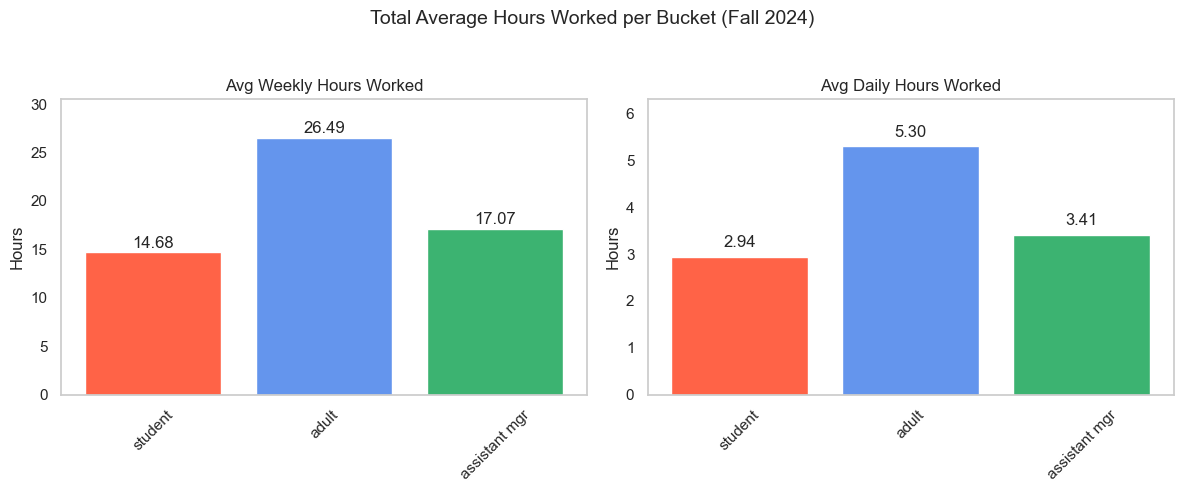

In [110]:
# Plot total avg hours worked per bucket, weekly and daily

# Extract values
buckets = df_q1_bucket_avg_total_hours['bucket']
weekly_hours = df_q1_bucket_avg_total_hours['avg_total_weekly_hours_worked']
daily_hours = df_q1_bucket_avg_total_hours['avg_total_daily_hours_worked']
x = np.arange(len(buckets))  # label locations

# Define custom colors per bucket
bucket_colors = {
    'student': 'tomato',
    'adult': 'cornflowerblue',
    'assistant mgr': 'mediumseagreen'
}
colors = [bucket_colors[bucket] for bucket in buckets]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# Weekly subplot
axs[0].bar(x, weekly_hours, color=colors)
axs[0].set_title('Avg Weekly Hours Worked')
axs[0].set_xticks(x)
axs[0].set_xticklabels(buckets, rotation=45)
axs[0].set_ylabel('Hours')
axs[0].set_ylim(0, df_q1_bucket_avg_total_hours['avg_total_weekly_hours_worked'].max() + 4)
axs[0].grid(False)
for i, v in enumerate(weekly_hours):
    axs[0].text(i, v + 0.5, f"{v:.2f}", ha='center')

# Daily subplot
axs[1].bar(x, daily_hours, color=colors)
axs[1].set_title('Avg Daily Hours Worked')
axs[1].set_xticks(x)
axs[1].set_xticklabels(buckets, rotation=45)
axs[1].set_ylabel('Hours')
axs[1].set_ylim(0, df_q1_bucket_avg_total_hours['avg_total_daily_hours_worked'].max() + 1)
axs[1].grid(False)
for i, v in enumerate(daily_hours):
    axs[1].text(i, v + 0.2, f"{v:.2f}", ha='center')

# Layout
plt.suptitle('Total Average Hours Worked per Bucket (Fall 2024)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


The above shows how many total hours each bucket works on average in a typical five-day workweek (Monday through Friday), as well as the hours per day in a five-day workweek. Again, we are looking to adjust the 'adult' bucket, since the 'student' bucket is already maximized and the 'assistant mgr' bucket cannot be adjusted due to work duties.

Since each employee works a different number of hours, we will want to figure a *weighted* hourly pay for the adult bucket.
To figure this we must first calculate the average hourly pay for employees in the adult bucket, along with the total number of hours they worked in the semester.

In [112]:
# calculate the average hourly pay for employees in the adult bucket, along with the total number of hours they worked in the semester.
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
)

SELECT 
    b.employee,
    b.bucket,
    b.pay_per_hour,
    ROUND(SUM(e.hours), 2) AS total_hours_worked
FROM bucket_cte AS b
JOIN printouts_table AS e
  ON b.employee = e.employee
JOIN pay_table as y
  ON e.week_of = y.week_of AND e.employee = y.employee
JOIN payroll_table AS j
  ON e.payroll_id = j.payroll_id
WHERE e.customer_id = 6
  AND j.job_pays BETWEEN 211 AND 230
  AND e.week_of >= '2024-08-05'
  AND b.bucket = 'adult'
  AND e.hours IS NOT NULL
GROUP BY b.employee, b.bucket, b.pay_per_hour;
"""

df = pd.read_sql(query, engine)
df

,employee,bucket,pay_per_hour,total_hours_worked
0,Cindy,adult,13.0,156.08
1,Janet,adult,12.5,109.72
2,Janet T,adult,12.0,210.13
3,Lisa,adult,12.0,4.62


To get the *weighted* hourly pay for the adult bucket, we do the following:

SUM(total_hours_worked * pay_per_hour) / SUM(total_hours_worked)

In [114]:
# calculate the weighted hourly pay for the adult bucket
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
),

adult_hours_and_pay AS(
    SELECT 
        b.employee,
        b.bucket,
        b.pay_per_hour,
        SUM(e.hours) AS total_hours_worked
    FROM bucket_cte AS b
    JOIN printouts_table AS e
      ON b.employee = e.employee
    JOIN pay_table as y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    WHERE e.customer_id = 6
      AND j.job_pays BETWEEN 211 AND 230
      AND e.week_of >= '2024-08-05'
      AND e.hours IS NOT NULL
    GROUP BY b.employee, b.bucket, b.pay_per_hour
)

SELECT
    bucket,
    ROUND(SUM(total_hours_worked * pay_per_hour) / SUM(total_hours_worked), 2) AS weighted_avg_adult_pay,
    total_hours_worked
FROM adult_hours_and_pay
GROUP BY bucket;
"""
# I just added total_hours_worked column. Also need to use this to figure if calculates up to current profit daily
df_weighted_bucket_pay = pd.read_sql(query, engine)
df_weighted_bucket_pay

,bucket,weighted_avg_adult_pay,total_hours_worked
0,adult,12.44,156.079487
1,assistant mgr,14.00,320.731371
2,student,10.12,46.716667


With this information, we can now calculate how many daily hours we need to reduce from the adult bucket. 

- Target daily profit = 100
- Current daily profit = 93.36
- Needed savings = 6.64 (that is, 100 - 93.36)
- Weighted average hourly pay for adult employees = 12.44

Hours to reduce = Needed savings / Weighted average pay

In [252]:
# Calculate daily time to reduce from adult bucket
needed_savings = 6.64
weighted_avg_pay = 12.44

hours_to_reduce = needed_savings / weighted_avg_pay
print(f"Minutes to reduce from total adult daily work hours:", round((hours_to_reduce*60),2))

Minutes to reduce from total adult daily work hours: 32.03


Conclusion: In order for the business to meet it daily profit goal of $100 per day under the current conditions, the employees in the adult bucket need to work a total of 32.03 (say 32) minutes less each day.

In order to help management decide where to make those cuts in hours, it is helpful to consider the number of days each adult employee worked and the average hours they worked on those days.

In [256]:
# find the number of days each adult employee worked and the average hours they worked on those days
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
)

SELECT 
    b.employee,
    b.bucket,
    b.pay_per_hour,
    ROUND(SUM(e.hours), 2) AS total_hours_worked,
    COUNT(e.date) AS num_days_worked,
    ROUND(SUM(e.hours)/COUNT(e.date), 2) AS avg_hours_per_day
FROM bucket_cte AS b
JOIN printouts_table AS e
  ON b.employee = e.employee
JOIN pay_table as y
  ON e.week_of = y.week_of AND e.employee = y.employee
JOIN payroll_table AS j
  ON e.payroll_id = j.payroll_id
WHERE e.customer_id = 6
  AND j.job_pays BETWEEN 211 AND 230
  AND e.week_of >= '2024-08-05'
  AND b.bucket = 'adult'
  AND e.hours IS NOT NULL
GROUP BY b.employee, b.bucket, b.pay_per_hour;
"""

df_adult_hours_days = pd.read_sql(query, engine)
df_adult_hours_days

,employee,bucket,pay_per_hour,total_hours_worked,num_days_worked,avg_hours_per_day
0,Cindy,adult,13.0,156.08,60,2.60
1,Janet,adult,12.5,109.72,86,1.28
2,Janet T,adult,12.0,210.13,88,2.39
3,Lisa,adult,12.0,4.62,3,1.54


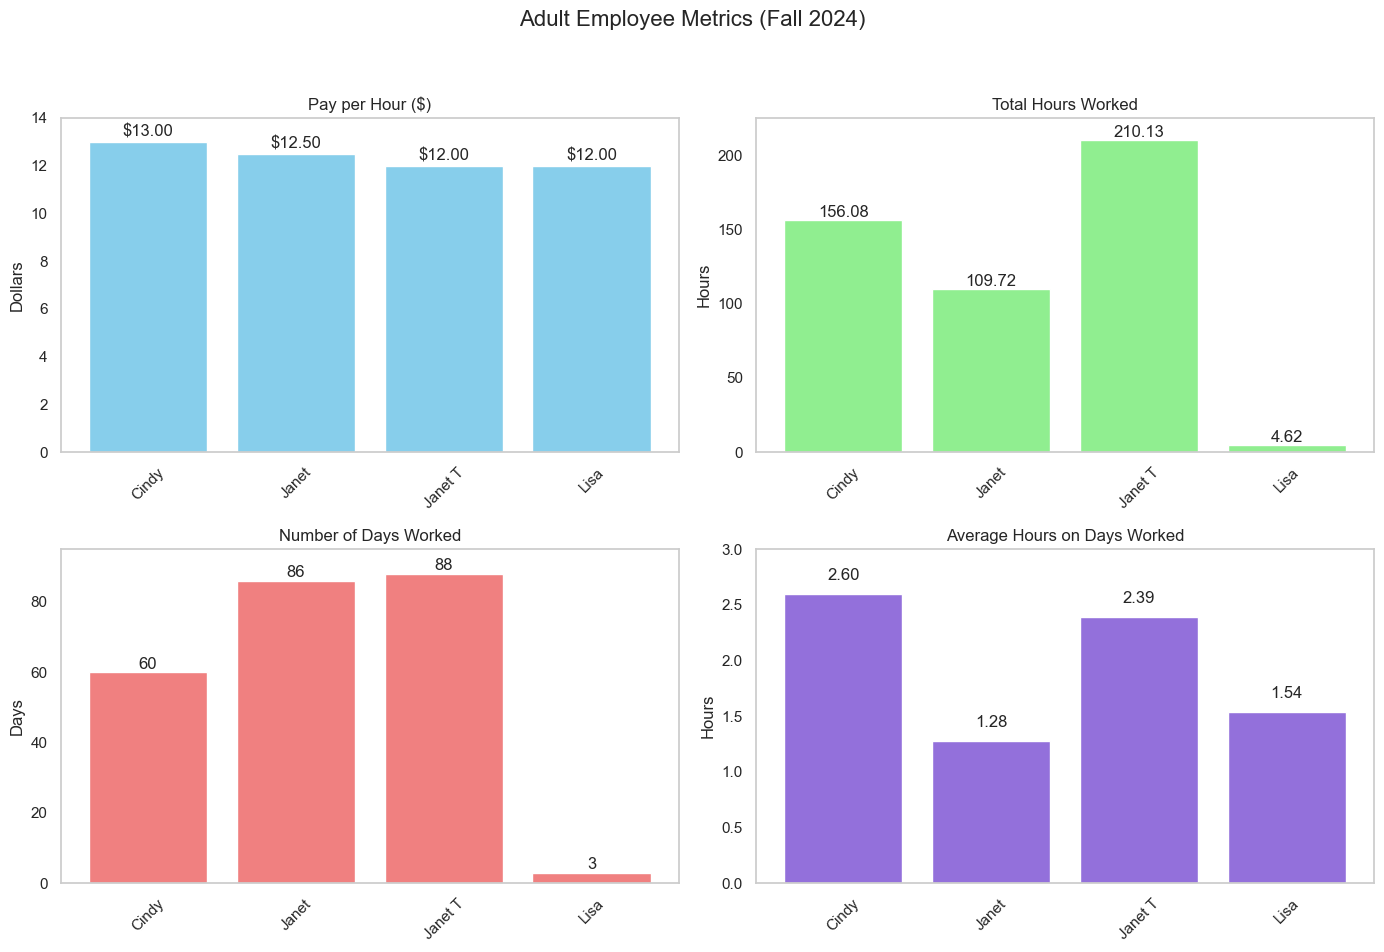

In [258]:
import matplotlib.pyplot as plt

# Sort by employee for consistency
df_sorted = df_adult_hours_days.sort_values('employee')

# Set up figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Adult Employee Metrics (Fall 2024)', fontsize=16)

# Bar chart: Pay per Hour
axs[0, 0].bar(df_sorted['employee'], df_sorted['pay_per_hour'], color='skyblue')
axs[0, 0].set_title('Pay per Hour ($)')
axs[0, 0].set_ylabel('Dollars')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].set_ylim(0, df_sorted['pay_per_hour'].max() + 1)
axs[0, 0].grid(False)
for i, v in enumerate(df_sorted['pay_per_hour']):
    axs[0, 0].text(i, v + 0.1, f"${v:.2f}", ha='center', va='bottom')

# Bar chart: Total Hours Worked
axs[0, 1].bar(df_sorted['employee'], df_sorted['total_hours_worked'], color='lightgreen')
axs[0, 1].set_title('Total Hours Worked')
axs[0, 1].set_ylabel('Hours')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].set_ylim(0, df_sorted['total_hours_worked'].max() + 15)
axs[0, 1].grid(False)
for i, v in enumerate(df_sorted['total_hours_worked']):
    axs[0, 1].text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom')

# Bar chart: Number of Days Worked
axs[1, 0].bar(df_sorted['employee'], df_sorted['num_days_worked'], color='lightcoral')
axs[1, 0].set_title('Number of Days Worked')
axs[1, 0].set_ylabel('Days')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].set_ylim(0, df_sorted['num_days_worked'].max() + 7)
axs[1, 0].grid(False)
for i, v in enumerate(df_sorted['num_days_worked']):
    axs[1, 0].text(i, v + 0.1, f"{v}", ha='center', va='bottom')

# Bar chart: Avg Hours per Day
axs[1, 1].bar(df_sorted['employee'], df_sorted['avg_hours_per_day'], color='mediumpurple')
axs[1, 1].set_title('Average Hours on Days Worked')
axs[1, 1].set_ylabel('Hours')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].set_ylim(0, df_sorted['avg_hours_per_day'].max() + 0.4)
axs[1, 1].grid(False)
for i, v in enumerate(df_sorted['avg_hours_per_day']):
    axs[1, 1].text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom')

# Layout adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # adjust for suptitle
plt.show()


Since Lisa barely worked (only 3 days out of the semester), the hours reduction will mostly effect the other three adult employees.

Finally, we will figure the current and target average hours for adult employees in hours and minutes.

In [274]:
# figure current daily hours, target daily hours, current weekly hours, target weekly hours for adult employees
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
),

daily_hours AS (
    SELECT
        b.bucket,
        e.week_of,
        e.day_of_week,
        SUM(e.hours) AS total_hours_that_day
    FROM printouts_table AS e
    JOIN bucket_cte AS b 
      ON e.employee = b.employee
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    WHERE e.week_of >= '2024-08-05'
      AND e.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230
      AND e.hours IS NOT NULL
    GROUP BY b.bucket, e.week_of, e.day_of_week
),

avg_daily_totals AS (
    SELECT
        day_of_week,
        bucket,
        AVG(total_hours_that_day) AS avg_total_hours_worked
    FROM daily_hours
    GROUP BY bucket, day_of_week
),
-- first figure current daily and weekly hours
current_hours AS (
    SELECT
        bucket,
        SUM(avg_total_hours_worked) AS current_weekly_hours,
        SUM(avg_total_hours_worked) / 5.0 AS current_daily_hours
    FROM avg_daily_totals
    GROUP BY bucket
)
-- now include target daily and weekly hours using 'Daily Hours to Reduce' formula
SELECT
    bucket,
    ROUND(current_daily_hours, 2) AS current_daily_hours,
    ROUND(current_daily_hours - (6.64 / 12.44), 2) AS target_daily_hours,             -- daily hours to reduce = 10.22(needed savings) - 12.44 (weighted adult avg pay)
    ROUND(current_weekly_hours, 2) AS current_weekly_hours,
    ROUND(current_weekly_hours - (6.64 / 12.44) * 5, 2) AS target_weekly_hours        -- weekly hours to reduce = daily hours to reduce * 5
FROM current_hours
WHERE bucket = 'adult';
"""

df_adult_target = pd.read_sql(query, engine)
df_adult_target

,bucket,current_daily_hours,target_daily_hours,current_weekly_hours,target_weekly_hours
0,adult,5.3,4.76,26.49,23.82


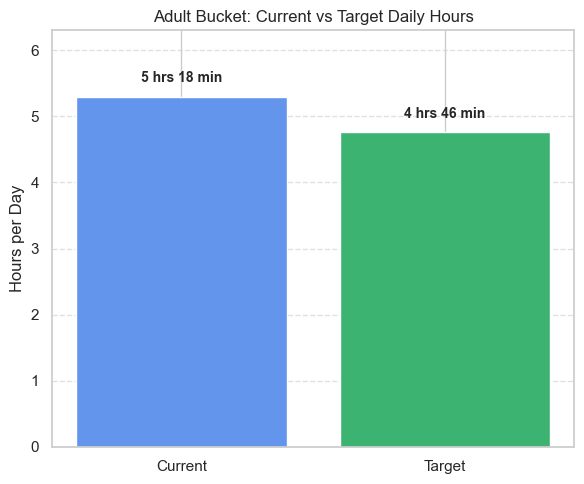

In [280]:
# Plot current and target daily hours for adult employees

# Extract values from df_adult_hours
current = df_adult_target.loc[0, 'current_daily_hours']
target = df_adult_target.loc[0, 'target_daily_hours']

# Data
labels = ['Current', 'Target']
values = [current, target]
colors = ['cornflowerblue', 'mediumseagreen']

# Function to convert decimal hours to "X hrs Y min"
def format_time(decimal_hours):
    hours = int(decimal_hours)
    minutes = round((decimal_hours - hours) * 60)
    return f"{hours} hrs {minutes} min"

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=colors)

# Annotate bars with hours and minutes
for bar, val in zip(bars, values):
    label = format_time(val)
    height = bar.get_height()
    plt.annotate(label,
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 8),
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Style
plt.title('Adult Bucket: Current vs Target Daily Hours')
plt.ylabel('Hours per Day')
plt.ylim(0, max(values) + 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


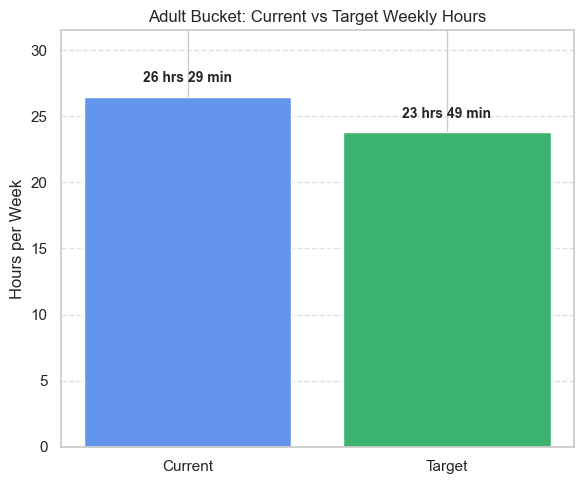

In [282]:
# Plot current and target weekly hours for adult employees

# Extract values from df_adult_hours
current = df_adult_target.loc[0, 'current_weekly_hours']
target = df_adult_target.loc[0, 'target_weekly_hours']

# Data
labels = ['Current', 'Target']
values = [current, target]
colors = ['cornflowerblue', 'mediumseagreen']

# Function to convert decimal hours to "X hrs Y min"
def format_time(decimal_hours):
    hours = int(decimal_hours)
    minutes = round((decimal_hours - hours) * 60)
    return f"{hours} hrs {minutes} min"

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=colors)

# Annotate bars with hours and minutes
for bar, val in zip(bars, values):
    label = format_time(val)
    height = bar.get_height()
    plt.annotate(label,
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 8),
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Style
plt.title('Adult Bucket: Current vs Target Weekly Hours')
plt.ylabel('Hours per Week')
plt.ylim(0, max(values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [289]:
# figure current daily hours, target daily hours, current weekly hours, target weekly hours for all employee buckets
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
),

daily_hours AS (
    SELECT
        b.bucket,
        e.week_of,
        e.day_of_week,
        SUM(e.hours) AS total_hours_that_day
    FROM printouts_table AS e
    JOIN bucket_cte AS b 
      ON e.employee = b.employee
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    WHERE e.week_of >= '2024-08-05'
      AND e.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230
      AND e.hours IS NOT NULL
    GROUP BY b.bucket, e.week_of, e.day_of_week
),

avg_daily_totals AS (
    SELECT
        day_of_week,
        bucket,
        AVG(total_hours_that_day) AS avg_total_hours_worked
    FROM daily_hours
    GROUP BY bucket, day_of_week
),
-- first figure current daily and weekly hours
current_hours AS (
    SELECT
        bucket,
        SUM(avg_total_hours_worked) AS current_weekly_hours,
        SUM(avg_total_hours_worked) / 5.0 AS current_daily_hours
    FROM avg_daily_totals
    GROUP BY bucket
)
-- now include target daily and weekly hours using 'Daily Hours to Reduce' formula
SELECT
    bucket,
    ROUND(current_daily_hours, 2) AS current_daily_hours,
    CASE
        WHEN bucket = 'adult'
        THEN ROUND(current_daily_hours - (6.64 / 12.44), 2)            -- daily hours to reduce = 10.22(needed savings) - 12.44 (weighted adult avg pay)    
        ELSE ROUND(current_daily_hours, 2)
    END AS target_daily_hours,
    ROUND(current_weekly_hours, 2) AS current_weekly_hours,
    CASE
        WHEN bucket = 'adult'
        THEN ROUND(current_weekly_hours - (6.64 / 12.44) * 5, 2)       -- weekly hours to reduce = daily hours to reduce * 5
        ELSE ROUND(current_weekly_hours, 2) 
    END AS target_weekly_hours
FROM current_hours;
"""

df_all_target = pd.read_sql(query, engine)
df_all_target

,bucket,current_daily_hours,target_daily_hours,current_weekly_hours,target_weekly_hours
0,adult,5.30,4.76,26.49,23.82
1,assistant mgr,3.41,3.41,17.07,17.07
2,student,2.94,2.94,14.68,14.68


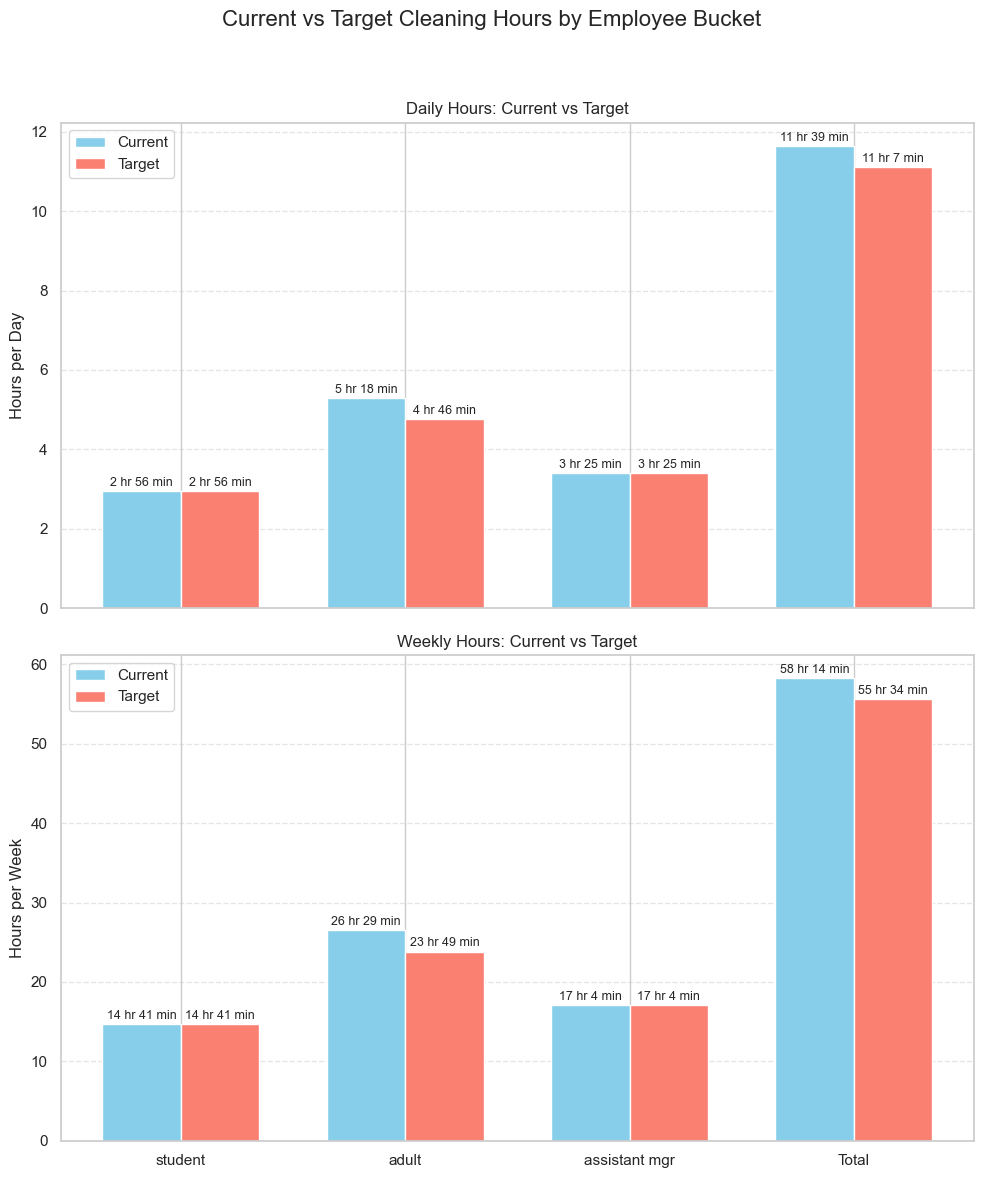

In [291]:
import matplotlib.pyplot as plt
import pandas as pd

# Helper function to format decimal hours as "H hr M min"
def format_hours_minutes(decimal_hours):
    hours = int(decimal_hours)
    minutes = int(round((decimal_hours - hours) * 60))
    return f"{hours} hr {minutes} min"

# Create total row and sort
df = df_all_target.copy()
totals = {
    'bucket': 'Total',
    'current_daily_hours': df['current_daily_hours'].sum(),
    'target_daily_hours': df['target_daily_hours'].sum(),
    'current_weekly_hours': df['current_weekly_hours'].sum(),
    'target_weekly_hours': df['target_weekly_hours'].sum()
}
df = pd.concat([df, pd.DataFrame([totals])], ignore_index=True)

# Define order and sort
order = ['student', 'adult', 'assistant mgr', 'Total']
df['bucket'] = pd.Categorical(df['bucket'], categories=order, ordered=True)
df = df.sort_values('bucket')

# Set x positions
x = df['bucket']
x_indices = range(len(x))
bar_width = 0.35

# Setup figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# ----------- DAILY HOURS ------------
axs[0].bar([i - bar_width/2 for i in x_indices], df['current_daily_hours'], 
           width=bar_width, label='Current', color='skyblue')
axs[0].bar([i + bar_width/2 for i in x_indices], df['target_daily_hours'], 
           width=bar_width, label='Target', color='salmon')

# Labels
for i, val in enumerate(df['current_daily_hours']):
    axs[0].text(i - bar_width/2, val + 0.05, format_hours_minutes(val), 
                ha='center', va='bottom', fontsize=9)
for i, val in enumerate(df['target_daily_hours']):
    axs[0].text(i + bar_width/2, val + 0.05, format_hours_minutes(val), 
                ha='center', va='bottom', fontsize=9)

axs[0].set_title('Daily Hours: Current vs Target')
axs[0].set_xticks(x_indices)
axs[0].set_xticklabels(df['bucket'])
axs[0].set_ylabel('Hours per Day')
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.5)

# ----------- WEEKLY HOURS ------------
axs[1].bar([i - bar_width/2 for i in x_indices], df['current_weekly_hours'], 
           width=bar_width, label='Current', color='skyblue')
axs[1].bar([i + bar_width/2 for i in x_indices], df['target_weekly_hours'], 
           width=bar_width, label='Target', color='salmon')

# Labels
for i, val in enumerate(df['current_weekly_hours']):
    axs[1].text(i - bar_width/2, val + 0.3, format_hours_minutes(val), 
                ha='center', va='bottom', fontsize=9)
for i, val in enumerate(df['target_weekly_hours']):
    axs[1].text(i + bar_width/2, val + 0.3, format_hours_minutes(val), 
                ha='center', va='bottom', fontsize=9)

axs[1].set_title('Weekly Hours: Current vs Target')
axs[1].set_xticks(x_indices)
axs[1].set_xticklabels(df['bucket'])
axs[1].set_ylabel('Hours per Week')
axs[1].legend()
axs[1].grid(axis='y', linestyle='--', alpha=0.5)

# Final layout
plt.suptitle('Current vs Target Cleaning Hours by Employee Bucket', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Conclusion
**Question 1: Under current conditions, how many hours should Kathy’s Cleaning be working each day at Covenant Academy in order to make it worthwhile for the business?**

Kathy's Cleaning should reduce the combined hours of the adult employees to and average of 4 hours 29 minutes per day, or 22 hours 23 minutes per 5-day week. The student hours should remain the same, at 14 hours 41 minutes per week, as they are the lowest-paid employees and they already work the maximum hours they are able. The assistant manager's hours should also remain, at 17 hours 5 minutes per week, due to work responsibilities.

In total, employees at the school should work an average of 10 hours 50 minutes per day, or 54 hours 8 minutes per week. 

This will enable Kathy's Cleaning to meet it's profit goal of $100 per day.

## Analysis for Question 2

**Question 2: What are the most profitable houses, and what houses need to be charged more?**

In [131]:
query = """
SELECT *
FROM payroll_table
LIMIT 3;
"""
df = pd.read_sql(query, engine)
df

,payroll_id,week,week_of,day_of_week,date,start,end,hours,customer_id,job_name,job_pays,kathy,note,week_number,time_varies_by_employee
0,1,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Monday,2021-01-04 00:00:00.000000,None,None,NaN,6,COV SCHL,211.0,171.05,None,1,1
1,2,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Tuesday,2021-01-05 00:00:00.000000,2021-01-05 09:34:00.000000,2021-01-05 11:01:00.000000,1.45,2,Neyman,85.0,54.26,None,1,0
2,3,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Tuesday,2021-01-05 00:00:00.000000,2021-01-05 11:10:00.000000,2021-01-05 12:37:00.000000,1.45,3,Brown,85.0,54.26,None,1,0


In [132]:
pd.read_sql("PRAGMA table_info(payroll_table);", engine)

,cid,name,type,notnull,dflt_value,pk
0,0,payroll_id,TEXT,0,None,0
1,1,week,TEXT,0,None,0
2,2,week_of,DATETIME,0,None,0
3,3,day_of_week,TEXT,0,None,0
4,4,date,DATETIME,0,None,0
5,5,start,DATETIME,0,None,0
6,6,end,DATETIME,0,None,0
7,7,hours,FLOAT,0,None,0
8,8,customer_id,TEXT,0,None,0
9,9,job_name,TEXT,0,None,0


In [133]:
query = """
SELECT *
FROM printouts_table
LIMIT 3;
"""
df = pd.read_sql(query, engine)
df

,printouts_id,employee,payroll_id,week_of,date,day_of_week,customer_id,job_name,hours,pay,note,week_number
0,1,Cindy,4,2021-01-04 00:00:00.000000,2021-01-05 00:00:00.000000,Tuesday,4,Crosby,1.100000,11.33,None,1
1,2,Cindy,5,2021-01-04 00:00:00.000000,2021-01-05 00:00:00.000000,Tuesday,5,Kittrell,1.066667,10.99,None,1
2,3,Faith,2,2021-01-04 00:00:00.000000,2021-01-05 00:00:00.000000,Tuesday,2,Neyman,1.450000,14.14,None,1


In [134]:
pd.read_sql("PRAGMA table_info(printouts_table);", engine)

,cid,name,type,notnull,dflt_value,pk
0,0,printouts_id,TEXT,0,None,0
1,1,employee,TEXT,0,None,0
2,2,payroll_id,TEXT,0,None,0
3,3,week_of,DATETIME,0,None,0
4,4,date,DATETIME,0,None,0
5,5,day_of_week,TEXT,0,None,0
6,6,customer_id,TEXT,0,None,0
7,7,job_name,TEXT,0,None,0
8,8,hours,FLOAT,0,None,0
9,9,pay,FLOAT,0,None,0


In [135]:
query = """
SELECT *
FROM customer_table
LIMIT 3;
"""
df = pd.read_sql(query, engine)
df

,customer_id,customer_name,customer_type
0,1,Hobbs,house
1,2,Neyman,house
2,3,Brown,house


In [136]:
pd.read_sql("PRAGMA table_info(customer_table);", engine)

,cid,name,type,notnull,dflt_value,pk
0,0,customer_id,TEXT,0,None,0
1,1,customer_name,TEXT,0,None,0
2,2,customer_type,TEXT,0,None,0


In [137]:
query = """
SELECT *
FROM pay_table
LIMIT 3;
"""
df = pd.read_sql(query, engine)
df

,pay_id,week_of,weekly_emp_pay_id,employee,pay_per_hour,note,week_number
0,2021_pay_1,2021-01-04 00:00:00.000000,1,Breanna,9.0,start date: 4/11/18,1
1,2021_pay_2,2021-01-04 00:00:00.000000,2,Brian,11.0,"start date: 01/19, Raise $1.00 on 7/1/19 End ...",1
2,2021_pay_3,2021-01-04 00:00:00.000000,3,Cindy,10.3,"start date: Aug 5, 2019 at $10.00 per hour. Ra...",1


In [138]:
pd.read_sql("PRAGMA table_info(pay_table);", engine)

,cid,name,type,notnull,dflt_value,pk
0,0,pay_id,TEXT,0,None,0
1,1,week_of,DATETIME,0,None,0
2,2,weekly_emp_pay_id,TEXT,0,None,0
3,3,employee,TEXT,0,None,0
4,4,pay_per_hour,FLOAT,0,None,0
5,5,note,TEXT,0,None,0
6,6,week_number,BIGINT,0,None,0


In [139]:
query = """
SELECT *
FROM employee_table
LIMIT 3;
"""
df = pd.read_sql(query, engine)
df

,employee_id,starting_date,start_back_date,birthday,employees_first_name,employees_last_name
0,Breanna,2018-04-11 00:00:00.000000,None,1992-08-05 00:00:00.000000,Breanna,Parker
1,Brian,2019-01-01 00:00:00.000000,2021-10-21 00:00:00.000000,1978-03-22 00:00:00.000000,Brian,Rosseau
2,Cindy,2019-08-05 00:00:00.000000,2023-05-19 00:00:00.000000,1956-06-01 00:00:00.000000,Cindy,Crowder


In [140]:
pd.read_sql("PRAGMA table_info(employee_table);", engine)

,cid,name,type,notnull,dflt_value,pk
0,0,employee_id,TEXT,0,None,0
1,1,starting_date,DATETIME,0,None,0
2,2,start_back_date,DATETIME,0,None,0
3,3,birthday,DATETIME,0,None,0
4,4,employees_first_name,TEXT,0,None,0
5,5,employees_last_name,TEXT,0,None,0


In [141]:
# Count customers by customer_type
query = """
SELECT 
    customer_type,
    COUNT(customer_type)
FROM customer_table
GROUP BY customer_type;
"""
df = pd.read_sql(query, engine)
df

,customer_type,COUNT(customer_type)
0,additional pay,2
1,adjustments,1
2,administrative,2
3,contract,2
4,house,60
5,office,2
6,other,1


In [142]:
# Count customers by customer_type, filtering out non-money-making types
query = """
SELECT 
    c.customer_type,
    COUNT(c.customer_type) AS total_num_jobs
FROM customer_table AS c
JOIN payroll_table AS j
  ON c.customer_id = j.customer_id
WHERE j.job_pays > 0
GROUP BY c.customer_type;
"""
df = pd.read_sql(query, engine)
df

,customer_type,total_num_jobs
0,contract,1675
1,house,2608
2,office,136


In [143]:
# Count customers by customer_name, filtering out non-money-making types
query = """
SELECT 
    c.customer_type,
    COUNT(DISTINCT(c.customer_name)) AS total_num_jobs
FROM customer_table AS c
JOIN payroll_table AS j
  ON c.customer_id = j.customer_id
WHERE j.job_pays > 0
GROUP BY c.customer_type;
"""
df = pd.read_sql(query, engine)
df

,customer_type,total_num_jobs
0,contract,2
1,house,58
2,office,2


In [144]:
# Filter 'house' customers from customer table
query = """
SELECT * 
FROM customer_table
WHERE customer_type = 'house'
LIMIT 5;
"""
df = pd.read_sql(query, engine)
df

,customer_id,customer_name,customer_type
0,1,Hobbs,house
1,2,Neyman,house
2,3,Brown,house
3,4,Crosby,house
4,5,Kittrell,house


In [145]:
# needs work...
# Find the houses that pay the most, and those that pay the least per job
query = """
SELECT *
FROM customer_table AS c
WHERE customer_type = 'house'
  AND customer_name IN (
                        SELECT customer_name
                          FROM payroll_table
                         ORDER BY job_pays+job_pays DESC
                         LIMIT 5
                         )

"""
df = pd.read_sql(query, engine)
df

,customer_id,customer_name,customer_type
0,1,Hobbs,house
1,2,Neyman,house
2,3,Brown,house
3,4,Crosby,house
4,5,Kittrell,house
5,7,Libby,house
6,8,Tidwell,house
7,9,Morris,house
8,10,Lambert,house
9,11,Greene,house


In [146]:
# needs work...
# Find the houses that pay the most, and those that pay the least per job
query = """
SELECT 
    c.customer_name,
    j.job_pays
FROM customer_table AS c
JOIN payroll_table AS j
  ON c.customer_id = j.customer_id
WHERE c.customer_type = 'house'
 AND j.job_pays > 0
GROUP BY c.customer_name, j.job_pays
ORDER BY j.job_pays DESC
"""
df = pd.read_sql(query, engine)
df

,customer_name,job_pays
0,Tyler Ross,360.00
1,Angie,260.00
2,Clayton,250.00
3,Libby,240.00
4,Wilson,240.00
...,...,...
140,Waldele,60.00
141,Tidwell,50.00
142,Hobbs,35.54
143,Marchman,35.00


We see that the bottom three jobs were under $35 and below. It is doubtful that this is the normal rate for cleaning a house. These were likely special small projects.

We also see that there are 145 rows. Above we saw that there are only 58 houses. Obviously many houses were charged various prices. Let's look into this.

In [148]:
# needs work... 
query = """
WITH cte AS (
    SELECT 
        c.customer_name,
        j.job_pays,
        COUNT(j.job_pays)
    FROM customer_table AS c
    JOIN payroll_table AS j
      ON c.customer_id = j.customer_id
    WHERE c.customer_type = 'house'
     AND j.job_pays > 0
    GROUP BY c.customer_name, j.job_pays
    HAVING COUNT(j.job_pays) > 5
    ORDER BY j.job_pays DESC, c.customer_name
)

SELECT customer_name, job_pays, COUNT(customer_name)
FROM cte
HAVING COUNT(customer_name) > 1;

"""
df = pd.read_sql(query, engine)
df

,customer_name,job_pays,COUNT(customer_name)
0,Asa,155.0,79


In [149]:
query = """
WITH ranked_jobs AS (
    SELECT
        c.customer_name,
        p.job_pays,
        p.date,
        ROW_NUMBER() OVER (
            PARTITION BY c.customer_name 
            ORDER BY p.date DESC
        ) AS job_rank
    FROM 
        payroll_table p
    JOIN 
        customer_table c ON p.customer_id = c.customer_id
)
SELECT 
    customer_name,
    job_pays,
    date
FROM 
    ranked_jobs
WHERE 
    job_rank <= 5
ORDER BY 
    customer_name,
    date DESC;


"""
df = pd.read_sql(query, engine)
df

,customer_name,job_pays,date
0,Alexander,100.0,2021-03-19 00:00:00.000000
1,Alexander,100.0,2021-03-05 00:00:00.000000
2,Alexander,100.0,2021-02-19 00:00:00.000000
3,Alexander,100.0,2021-02-05 00:00:00.000000
4,Alexander,100.0,2021-01-22 00:00:00.000000
...,...,...,...
303,Yates,85.0,2024-12-13 00:00:00.000000
304,Yates,85.0,2024-11-15 00:00:00.000000
305,Yates,85.0,2024-11-01 00:00:00.000000
306,Yates,85.0,2024-10-18 00:00:00.000000


In [150]:
query = """
WITH latest_jobs_cte AS(
    SELECT 
        c.customer_name,
        job_pays,
        date,
        ROW_NUMBER() OVER(PARTITION BY c.customer_name
                    ORDER BY date DESC
                    ) AS rank_latest_jobs
    FROM customer_table AS c
    JOIN payroll_table AS j
      ON c.customer_id = j.customer_id
)

SELECT 
    customer_name,
    job_pays,
    date
FROM latest_jobs_cte
WHERE rank_latest_jobs <= 5
ORDER by customer_name, date DESC;
"""

df = pd.read_sql(query, engine)
df

,customer_name,job_pays,date
0,Alexander,100.0,2021-03-19 00:00:00.000000
1,Alexander,100.0,2021-03-05 00:00:00.000000
2,Alexander,100.0,2021-02-19 00:00:00.000000
3,Alexander,100.0,2021-02-05 00:00:00.000000
4,Alexander,100.0,2021-01-22 00:00:00.000000
...,...,...,...
303,Yates,85.0,2024-12-13 00:00:00.000000
304,Yates,85.0,2024-11-15 00:00:00.000000
305,Yates,85.0,2024-11-01 00:00:00.000000
306,Yates,85.0,2024-10-18 00:00:00.000000


# chat gpt...
So, for each customer/house, you want to find:

the most recent job_pays value that is also the most common among recent jobs for that customer.

✅ Plan:
We will:

Limit to recent jobs per customer (e.g. last 10 or 20).

Group those by job_pays to count how often each price appears.

Pick the most common price — and if there's a tie, choose the most recent.






🔍 Explanation:
recent_jobs: All jobs with a valid date.

(Optional: you can limit this to last 10–20 jobs per customer for speed.)

ranked_frequencies:

Groups by customer_id and job_pays.

Counts how often each price occurs.

Gets the most recent date each price was used.

Ranks them: most frequent first, break ties by recency.

Final query selects the top-ranked (rn = 1) result per customer.

In [152]:
query = """
WITH recent_jobs AS (
    SELECT
        p.customer_id,
        p.job_pays,
        p.date
    FROM payroll_table p
    WHERE p.date IS NOT NULL
)
--,
--ranked_frequencies AS (
    SELECT
        r.customer_id,
        r.job_pays,
        COUNT(*) AS frequency,
        MAX(r.date) AS most_recent_date,
        ROW_NUMBER() OVER (
            PARTITION BY r.customer_id
            ORDER BY MAX(r.date) DESC, COUNT(*) DESC
        ) AS rn
    FROM recent_jobs AS r
--    JOIN customer_table AS c
--      ON r.customer_id = c.customer_id
--    WHERE c.customer_type = 'house'
    GROUP BY r.customer_id, r.job_pays
"""
df = pd.read_sql(query, engine)
df

,customer_id,job_pays,frequency,most_recent_date,rn
0,1,90.00,29,2024-12-31 00:00:00.000000,1
1,1,80.00,30,2023-10-10 00:00:00.000000,2
2,1,85.00,3,2023-09-26 00:00:00.000000,3
3,1,75.00,26,2022-05-10 00:00:00.000000,4
4,1,35.54,1,2021-12-21 00:00:00.000000,5
...,...,...,...,...,...
189,7,150.00,2,2021-08-26 00:00:00.000000,5
190,7,240.00,1,2021-03-31 00:00:00.000000,6
191,8,50.00,49,2024-12-16 00:00:00.000000,1
192,9,90.00,37,2022-07-21 00:00:00.000000,1


In [153]:
# Find current customers and their current pay rate

query = """
WITH recent_jobs AS (
    SELECT
        p.customer_id,
        p.job_pays,
        p.date
    FROM payroll_table p
    WHERE p.date IS NOT NULL
),
ranked_frequencies AS (
    SELECT
        r.customer_id,
        r.job_pays,
        COUNT(*) AS frequency,
        MAX(r.date) AS most_recent_date,
        ROW_NUMBER() OVER (
            PARTITION BY r.customer_id
            ORDER BY MAX(r.date) DESC, COUNT(*) DESC
        ) AS rn
    FROM recent_jobs r
    GROUP BY r.customer_id, r.job_pays
)
SELECT
    c.customer_name,
    c.customer_id,
    f.job_pays AS latest_normal_rate,
    f.most_recent_date,
    f.frequency
FROM ranked_frequencies f
JOIN customer_table c 
  ON f.customer_id = c.customer_id
WHERE f.rn = 1
  AND c.customer_type = 'house'
  AND most_recent_date > '2024-04-01'                                     -- excude old customers
  AND c.customer_id NOT IN (42)                                           -- exclude additional known old customer
ORDER BY c.customer_name;


"""
df = pd.read_sql(query, engine)
df

,customer_name,customer_id,latest_normal_rate,most_recent_date,frequency
0,Asa,63,155.0,2024-12-23 00:00:00.000000,15
1,Battle,24,100.0,2024-12-12 00:00:00.000000,10
2,Brandi,21,95.0,2024-12-10 00:00:00.000000,30
3,Brenda,18,70.0,2024-12-04 00:00:00.000000,28
4,Brown,3,95.0,2024-12-17 00:00:00.000000,24
5,Cantrell,14,85.0,2025-01-03 00:00:00.000000,94
6,Cram,36,85.0,2024-11-20 00:00:00.000000,11
7,D. Cantrell,40,110.0,2024-12-06 00:00:00.000000,4
8,Denny,20,95.0,2024-12-10 00:00:00.000000,57
9,Hardison,32,100.0,2024-12-30 00:00:00.000000,16


In [154]:
# group houses by customer_name and job_pays and count 
query = """
SELECT 
    c.customer_name,
    j.job_pays,
    COUNT(j.job_pays)
FROM customer_table AS c
JOIN payroll_table AS j
  ON c.customer_id = j.customer_id
WHERE c.customer_type = 'house'
GROUP BY c.customer_name, j.job_pays;

"""
df = pd.read_sql(query, engine)
print(df)

    customer_name  job_pays  COUNT(j.job_pays)
0       Alexander     100.0                  5
1           Angie      75.0                  2
2           Angie     135.0                 32
3           Angie     260.0                  1
4             Asa     155.0                 15
..            ...       ...                ...
148         Yates       0.0                  2
149         Yates      25.0                  1
150         Yates      75.0                 45
151         Yates      80.0                 16
152         Yates      85.0                 26

[153 rows x 3 columns]
